In [1]:
from pylab import rcParams

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import statsmodels.api as sm

In [4]:
import uszipcode

In [4]:
import numpy as np

import pandas as pd

import matplotlib as plt
plt.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
import seaborn as sns

# Call data EDA

In [7]:
calls = pd.read_csv("police-department-calls-for-service.csv",parse_dates = ['Report Date','Call Date','Offense Date','Call Date Time'])
calls.columns = [col.strip() for col in calls.columns] 
calls.head()

,Crime Id,Original Crime Type Name,Report Date,Call Date,Offense Date,Call Time,Call Date Time,Disposition,Address,City,State,Agency Id,Address Type,Common Location
0,193274171,Passing Call,2019-11-23,2019-11-23,2019-11-23,23:54,2019-11-23 23:54:00,HAN,1000 Block Of Larkin St,San Francisco,CA,1,Premise Address,NaN
1,193274162,Fight No Weapon,2019-11-23,2019-11-23,2019-11-23,23:45,2019-11-23 23:45:00,CAN,100 Block Of Ocean Av,San Francisco,CA,1,Premise Address,NaN
2,193274160,Passing Call,2019-11-23,2019-11-23,2019-11-23,23:51,2019-11-23 23:51:00,HAN,400 Block Of Duboce Av,San Francisco,CA,1,Premise Address,NaN
3,193274158,Well Being Check,2019-11-23,2019-11-23,2019-11-23,23:50,2019-11-23 23:50:00,HAN,King St/4th St,San Francisco,CA,1,Intersection,NaN
4,193274157,Passing Call,2019-11-23,2019-11-23,2019-11-23,23:50,2019-11-23 23:50:00,HAN,100 Block Of Scott St,San Francisco,CA,1,Common Location,"Duboce Park, Sf"


In [9]:
calls.shape

(3035330, 14)

In [10]:
# Only City and Common Location have null values
1.0 * calls.isnull().sum()/calls.shape[0]

Crime Id                    0.000000
Original Crime Type Name    0.000000
Report Date                 0.000000
Call Date                   0.000000
Offense Date                0.000000
Call Time                   0.000000
Call Date Time              0.000000
Disposition                 0.000000
Address                     0.000000
City                        0.024874
State                       0.000000
Agency Id                   0.000000
Address Type                0.000000
Common Location             0.892429
dtype: float64

In [11]:
print (calls['Call Date'].max())
print (calls['Call Date'].min())

2019-11-23 00:00:00
2016-03-30 00:00:00


In [12]:
calls['Original Crime Type Name'].value_counts(1)*100

Passing Call          14.757176
Traffic Stop           9.375323
Suspicious Person      4.989573
Homeless Complaint     4.689869
22500e                 3.432806
                        ...    
W/ Aggresive Dog       0.000033
Abusive                0.000033
Stereo Speaker         0.000033
800594                 0.000033
418neighbor            0.000033
Name: Original Crime Type Name, Length: 22272, dtype: float64

In [13]:
calls['Original Crime Type Name'].value_counts(1)[:4].sum()*100

33.81194137046054

In [14]:
(calls['Disposition'].value_counts(1)[:6]*100).sum()

79.22637736259318

In [15]:
calls['Disposition'].value_counts(1)[:6]

HAN             0.282365
GOA             0.129401
CIT             0.116138
ADV             0.103047
REP             0.080765
Not recorded    0.080547
Name: Disposition, dtype: float64

In [16]:
calls['City'].value_counts(1)*100

San Francisco    99.113158
Treasure Isla     0.678215
Yerba Buena       0.095715
Daly City         0.047976
Hunters Point     0.030644
Presidio          0.029563
Fort Mason        0.003007
Brisbane          0.001723
Name: City, dtype: float64

In [17]:
calls['State'].value_counts()

CA    3035330
Name: State, dtype: int64

In [18]:
calls['Agency Id'].value_counts()

1    3035330
Name: Agency Id, dtype: int64

In [19]:
calls['Address Type'].value_counts(1)*100

Premise Address    50.592028
Intersection       34.250609
Common Location    10.757150
Geo-Override        4.400213
Name: Address Type, dtype: float64

In [20]:
sum(calls['Common Location'].isnull())*1.0/calls.shape[0]

0.8924285003607515

In [21]:
# the remaining 11% of data that has values, it is still very fragamented
calls['Common Location'].value_counts(1)*100

Un Pz, Sf                         3.344104
Haight St Corridor                2.349969
Twin Peaks Viewpoint, Sf          1.940493
Powell St Muni, Sf                1.768372
One Hallidie Pz, Sf               1.601152
                                    ...   
Moscone West #Flr 3, Sf           0.000306
W Hotel #17, Sf                   0.000306
Winton Hotel Sro #102, Sf         0.000306
Marines Memorial Bldg #602, Sf    0.000306
Seneca Hotel Sro #132, Sf         0.000306
Name: Common Location, Length: 9154, dtype: float64

### Create new features"

In [31]:
calls['call_hour'] = calls['Call Time'].apply(lambda x: int(x[:2]))

In [32]:
calls['call_hour'].value_counts(1)

17    0.067850
16    0.065991
18    0.062268
12    0.053887
15    0.053249
13    0.052452
9     0.051388
14    0.051288
10    0.051197
11    0.051152
19    0.050877
8     0.048032
22    0.044988
20    0.041172
7     0.040593
21    0.040263
23    0.037974
0     0.029171
1     0.022584
6     0.022374
2     0.019330
3     0.014913
5     0.013714
4     0.013295
Name: call_hour, dtype: float64

Text(0.5, 1.0, "Distribution of calls for service across 16'Mar-19'Nov")

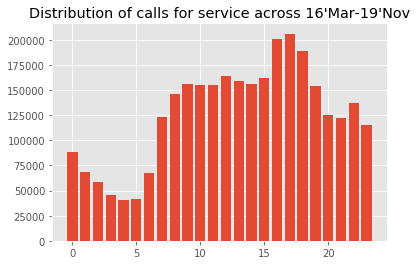

In [33]:
plt.bar(calls['call_hour'].value_counts().index,calls['call_hour'].value_counts());
plt.title("Distribution of calls for service across 16'Mar-19'Nov")

In [34]:
hours_to_cat = {"call_hour":{1:"late_night",2:"late_night",3:"late_night",4:"late_night",5:"late_night",6:"late_night",
                                 7:"day",8:"day",9:"day",10:"day",11:"day",12:"day",13:"day",14:"day",15:"day",
                                  16:"late_afternoon",17:"late_afternoon",18:"late_afternoon",19:"late_afternoon",
                             20:"evening",21:"evening",22:"evening",23: "evening", 24: "evening"
                            }}

In [35]:
calls.replace(hours_to_cat, inplace=True);

In [36]:
calls['call_hour_int'] = calls['Call Time'].apply(lambda x: int(x[:2]))

**No difference between Offense Date, Report Date and Call Date**

In [37]:
(calls['Report Date'] - calls['Offense Date']).value_counts()

0 days    3035330
dtype: int64

In [38]:
(calls['Offense Date'] - calls['Call Date']).value_counts()

0 days    3035330
dtype: int64

In [39]:
calls['day_of_week'] = calls['Call Date'].apply(lambda x: x.dayofweek)

In [40]:
calls['day_of_week'].value_counts(1)

2    0.148517
4    0.145539
3    0.145057
1    0.144624
5    0.142189
0    0.141405
6    0.132669
Name: day_of_week, dtype: float64

In [41]:
int_to_dow = {"day_of_week":{0:"Mon",1:"Tue",2:"Wed",4:"Fri",5:"Sat",6:"Sun"
                            }}

In [42]:
calls.replace(int_to_dow, inplace = True)

In [43]:
calls['day_of_month'] = calls['Call Date'].apply(lambda x: x.day)

Text(0.5, 1.0, "Distribution of Day_of_Month for calls 16'Mar - 19'Nov")

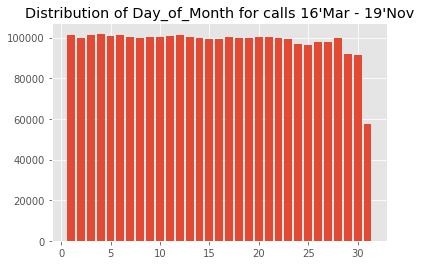

In [45]:
plt.bar(calls['day_of_month'].value_counts().index,calls['day_of_month'].value_counts());
plt.title("Distribution of Day_of_Month for calls 16'Mar - 19'Nov")

In [46]:
calls.loc[calls['day_of_month'] <= 10, 'day_of_month_cat'] = 'beginning'

In [47]:
mid_month = list(np.arange(10,21))

In [48]:
calls.loc[calls['day_of_month'].isin(mid_month), 'day_of_month_cat'] = 'mid'

In [49]:
end_month = list(np.arange(21,32))
end_month

[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]

In [50]:
calls.loc[calls['day_of_month'].isin(end_month), 'day_of_month_cat'] = 'end'

In [51]:
(~calls['Common Location'].isnull())*1

0          0
1          0
2          0
3          0
4          1
          ..
3035325    0
3035326    0
3035327    0
3035328    0
3035329    0
Name: Common Location, Length: 3035330, dtype: int64

In [52]:
calls['common_loc_bool'] = (~calls['Common Location'].isnull()) * 1 

In [53]:
calls['common_loc_bool'].value_counts()

0    2708815
1     326515
Name: common_loc_bool, dtype: int64

In [55]:
calls.head()

,Crime Id,Original Crime Type Name,Report Date,Call Date,Offense Date,Call Time,Call Date Time,Disposition,Address,City,State,Agency Id,Address Type,Common Location,call_hour,call_hour_int,day_of_week,day_of_month,day_of_month_cat,common_loc_bool
0,193274171,Passing Call,2019-11-23,2019-11-23,2019-11-23,23:54,2019-11-23 23:54:00,HAN,1000 Block Of Larkin St,San Francisco,CA,1,Premise Address,NaN,evening,23,Sat,23,end,0
1,193274162,Fight No Weapon,2019-11-23,2019-11-23,2019-11-23,23:45,2019-11-23 23:45:00,CAN,100 Block Of Ocean Av,San Francisco,CA,1,Premise Address,NaN,evening,23,Sat,23,end,0
2,193274160,Passing Call,2019-11-23,2019-11-23,2019-11-23,23:51,2019-11-23 23:51:00,HAN,400 Block Of Duboce Av,San Francisco,CA,1,Premise Address,NaN,evening,23,Sat,23,end,0
3,193274158,Well Being Check,2019-11-23,2019-11-23,2019-11-23,23:50,2019-11-23 23:50:00,HAN,King St/4th St,San Francisco,CA,1,Intersection,NaN,evening,23,Sat,23,end,0
4,193274157,Passing Call,2019-11-23,2019-11-23,2019-11-23,23:50,2019-11-23 23:50:00,HAN,100 Block Of Scott St,San Francisco,CA,1,Common Location,"Duboce Park, Sf",evening,23,Sat,23,end,1


## Feature enginnering

In [56]:
def convert_to_bool(df, col_list):
    for i in col_list:
        df['is_{}'.format(i)] = (~df[i].isnull()) * 1 
    return df

In [41]:
def dummify(df, col_list):
    '''dummify categorical features.
    '''
    for col in col_list:
        if df[col].isnull().sum() == 0:
            dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
        else:
            dummies = pd.get_dummies(
                df[col], prefix=col, dummy_na=True, drop_first=True)
        df[dummies.columns] = dummies
    return df

In [42]:
def drop_cols (df, col_list):
    df = df.drop(col_list, axis=1)
    return df 

In [59]:
def crime_type_encoding(df, crime_type_names):
    for i in crime_type_names:
        df["crime_type_{}".format(i)] = np.where(df["Original Crime Type Name"].str.contains(i), 1, 0)
    return df 

In [60]:
def dispo_type_encoding(df, dispo_types):
    for i in dispo_types:
        df["disposition_{}".format(i)] = np.where(df["Disposition"].str.contains(i), 1, 0)
    return df 

In [61]:
def feature_enginner(df, cols_bool, cols_dummy, cols_to_drop, crime_type_names, dispo_types):
    df2 = convert_to_bool(df,cols_bool)
    df2 = crime_type_encoding(df,crime_type_names)
    df2 = dispo_type_encoding(df,dispo_types)
    df2 = dummify(df,cols_dummy)
    df2 = drop_cols(df, cols_to_drop)
#     scaler = StandardScaler()
#     scaler.fit(df.values)
#     X = scaler.transform(df.values)
    return df2

In [62]:
useless_cols = ['State','Agency Id','City', 'Crime Id','Report Date','Offense Date']
engineered_cols = ['Original Crime Type Name','call_hour_int','day_of_month','Call Time',
                   'Call Date','Call Date Time','Disposition',
                  'call_hour','day_of_week','day_of_month_cat',
                  'Address Type', 'Common Location']
unused_col = ['Address']
calls_drop_features = useless_cols + engineered_cols + unused_col

In [63]:
calls_dummy_features = ['Address Type','call_hour','day_of_week','day_of_month_cat']

In [64]:
crime_type_names = ['Passing Call','Traffic Stop','Suspicious Person','Homeless Complaint'] #

In [65]:
dispo_types = ['HAN','GOA','CIT','ADV','REP','Not recorded']

In [66]:
bools_cols = ['Common Location']

In [67]:
calls_fe = feature_enginner(calls, bools_cols, calls_dummy_features, calls_drop_features, crime_type_names, dispo_types)

In [68]:
calls_fe.tail(10).transpose()

,3035320,3035321,3035322,3035323,3035324,3035325,3035326,3035327,3035328,3035329
common_loc_bool,0,0,0,0,0,0,0,0,0,0
is_Common Location,0,0,0,0,0,0,0,0,0,0
crime_type_Passing Call,0,0,0,0,0,0,0,0,0,0
crime_type_Traffic Stop,0,0,0,0,0,0,0,0,0,0
crime_type_Suspicious Person,0,0,0,0,0,0,0,0,0,0
crime_type_Homeless Complaint,0,0,1,1,0,0,0,0,1,0
disposition_HAN,0,0,1,0,0,0,0,0,0,0
disposition_GOA,0,0,0,0,1,0,1,1,1,0
disposition_CIT,0,0,0,0,0,0,0,0,0,0
disposition_ADV,1,0,0,1,0,0,0,0,0,0


## Clustering for Calls - PCA + Kmeans

**mention alternatives: hieratical, and the challenge here about the high demensionality brought by categorical features**

In [69]:
from sklearn.cluster import KMeans 

In [70]:
from sklearn.decomposition import PCA

In [72]:
from scipy import stats
from collections import Counter
from sklearn.metrics import silhouette_score
from time import time

In [75]:
# calls = pd.read_csv("police-department-calls-for-service.csv",parse_dates = ['Report Date','Call Date','Offense Date','Call Date Time'])
# calls.columns = [col.strip() for col in calls.columns] 

In [77]:
# cluster_df = calls.drop(useless_cols,axis = 1)

In [78]:
# cluster_df.head()

In [79]:
# def convert_to_cat (df, cols):
#     for i in cols:
#         df[i] = df[i].astype('category')
#     return df

In [80]:
# cluster_df = convert_to_cat(cluster_df, ['Original Crime Type Name','Address Type','Disposition'])

In [81]:
# cluster_df.head()

### PCA

In [82]:
calls_fe.head()

,common_loc_bool,is_Common Location,crime_type_Passing Call,crime_type_Traffic Stop,crime_type_Suspicious Person,crime_type_Homeless Complaint,disposition_HAN,disposition_GOA,disposition_CIT,disposition_ADV,...,call_hour_late_afternoon,call_hour_late_night,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Tue,day_of_week_Wed,day_of_month_cat_end,day_of_month_cat_mid
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [84]:
X = calls_fe.values

In [85]:
scaler = StandardScaler()
scaler.fit(calls_fe.values)
X_scaled = scaler.transform(calls_fe.values)

In [86]:
X.shape

(3035330, 27)

In [94]:
def PCA_reduce(X,dimensionality):
    '''[summary]
    reduced n dimensionality matrix and np array of important features
    Arguments:
        X {[numpy matrix]} -- input matrix
        dimensionality {[int]} -- to what dimensionality to reduce to
    Returns:
        X_reduced -- reduced matrix
        important_features -- a list of features that contributed most to the principle component
    '''

    important_features = []
    pcd = PCA(dimensionality).fit(X)
    pca_matrix = pcd.components_
    for i in range(dimensionality):
        print('#{} Principle Component top 5 contributors are:'.format(i), np.argsort(np.abs(pca_matrix[i,:]))[-5:])
        important_features.append(np.argsort(np.abs(pca_matrix[i,:]))[-3:])
    X_reduced = np.dot(X,pcd.components_.T)
    print('Reduced X shape:', X_reduced.shape)
    important_features = np.array(important_features)
    print('Explained variance:', pcd.explained_variance_)
    print('Explained variance ratio:', pcd.explained_variance_ratio_)
    print('Explained variance ratio accumulated:', pcd.explained_variance_ratio_.cumsum())
    return X_reduced, important_features


In [108]:
important_features = []
pcd = PCA(10).fit(X)
pca_matrix = pcd.components_
for i in range(10):
    print('#{} Principle Component top 5 contributors are:'.format(i), np.argsort(np.abs(pca_matrix[i,:]))[-5:])
    important_features.append(np.argsort(np.abs(pca_matrix[i,:]))[-3:])
re_X_ww = np.dot(X,pcd.components_.T)
print('Reduced X shape:', re_X_ww.shape)

imp_f_ww = np.array(important_features)
print('Explained variance:', pcd.explained_variance_)
print('Explained variance ratio:', pcd.explained_variance_ratio_)
print('Explained variance ratio accumulated:', pcd.explained_variance_ratio_.cumsum())


#0 Principle Component top 5 contributors are: [17  2 15 13 14]
#1 Principle Component top 5 contributors are: [20 15 13 25 26]
#2 Principle Component top 5 contributors are: [14 16  6 17 15]
#3 Principle Component top 5 contributors are: [ 2  0  1 13  6]
#4 Principle Component top 5 contributors are: [17 16  0  1  6]
#5 Principle Component top 5 contributors are: [ 0  1  6 17 16]
#6 Principle Component top 5 contributors are: [20 21 23 19 24]
#7 Principle Component top 5 contributors are: [ 8 20 24 19 23]
#8 Principle Component top 5 contributors are: [ 3  8 23 19 21]
#9 Principle Component top 5 contributors are: [ 7  8 21 23 20]
Reduced X shape: (3035330, 10)
Explained variance: [0.44806277 0.35042103 0.33997379 0.31031311 0.20274319 0.19523443
 0.14772697 0.14533773 0.14385062 0.14249428]
Explained variance ratio: [0.12711305 0.0994126  0.09644877 0.08803419 0.05751717 0.05538698
 0.04190936 0.04123155 0.04080966 0.04042487]
Explained variance ratio accumulated: [0.12711305 0.22652

In [109]:
imp_f_ww

array([[15, 13, 14],
       [13, 25, 26],
       [ 6, 17, 15],
       [ 1, 13,  6],
       [ 0,  1,  6],
       [ 6, 17, 16],
       [23, 19, 24],
       [24, 19, 23],
       [23, 19, 21],
       [21, 23, 20]])

Text(0, 0.5, 'Accumulated Explained Variance')

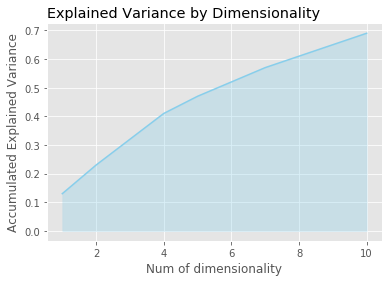

In [110]:
# Plot explained variance by dimensionality
x = range(1,11)
y = np.round(pcd.explained_variance_ratio_.cumsum(),2)
plt.fill_between(x, y, color="skyblue", alpha=0.3)
plt.plot(x, y, color="skyblue")
 
# Add titles and labels
plt.title("Explained Variance by Dimensionality", loc="left")
plt.xlabel("Num of dimensionality")
plt.ylabel("Accumulated Explained Variance")

In [143]:
pcd = PCA(4).fit(X) #re-assign PCA class to reduce to 4 dimensionality

In [111]:
re_X_ww = re_X_ww[:,:4] #cut dimensiontly from 10 to 4

In [116]:
def print_imp_features(df,imp_features):
    '''[summary]
    print important features names and return the counter of the features
    Arguments:
        df {[pandas dataframe]} -- input
        imp_features {[list]} -- important features returned from pca_reduce function
    Returns:
        counter [dictionary] -- a dictionary with feature name as key, and frequency showed as value 
    '''

    feature = []
    idx = 0
    c = 1
    while idx < len(np.array(imp_features).flatten()):
        print('#{} PC:'.format(c))
        if idx+3 > len(np.array(imp_features).flatten()):
            for i in np.array(imp_features).flatten()[idx:]:
                feature.append(list(df.columns)[i])
                print(list(df.columns)[i])
        else:
            for i in np.array(imp_features).flatten()[idx:idx+3]:
                feature.append(list(df.columns)[i])
                print(list(df.columns)[i])
        idx += 3
        c +=1
    counter = Counter(feature)
    return counter

In [117]:
# print out top 5 contributers for each principle component to understand what features are providing signals
counter = print_imp_features(calls_fe,imp_f_ww[:4,:])

#1 PC:
call_hour_day
Address Type_Intersection
Address Type_Premise Address
#2 PC:
Address Type_Intersection
day_of_month_cat_end
day_of_month_cat_mid
#3 PC:
disposition_HAN
call_hour_late_afternoon
call_hour_day
#4 PC:
is_Common Location
Address Type_Intersection
disposition_HAN


### We will use 3 dimensionality here for visualization purpose.

In [118]:
re_X_3 = re_X_ww[:,:3]

In [119]:
from mpl_toolkits.mplot3d import Axes3D

In [120]:
def matplotlib_3D_X_reduced(X_reduced,label1="First Principle Component",label2="Second Principle Component",label3="Third Principle Component",title="Scatterplot in PCA 3D-Plane"):
    '''use matplotlib to plot the 3D PCA results'''
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    # for c, m in [('r', 'o'), ('b', '^')]:
    xs=X_reduced[:,0]
    ys=X_reduced[:,1]
    zs=X_reduced[:,2]
    ax.scatter(xs, ys, zs, c='green', marker='^')
    ax.set_xlabel(label1)
    ax.set_ylabel(label2)
    ax.set_zlabel(label3)
    ax.set_title(title)
    plt.show()

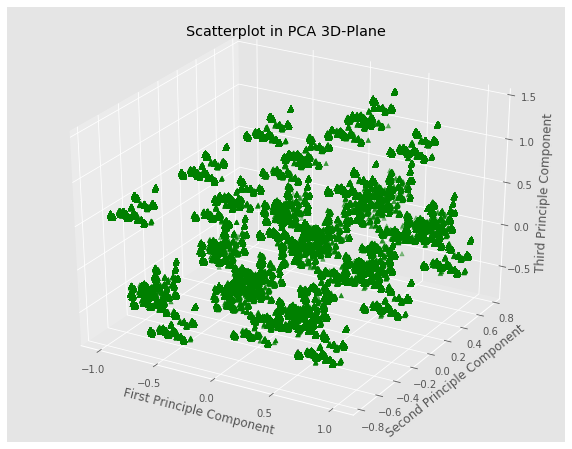

In [121]:
matplotlib_3D_X_reduced(re_X_3)

### KMeans modeling

In [122]:
def kmeans_cluster(X_reduced,cluster_num):
    '''[summary]
    use kmeans++ algorithems to cluster input data.
    Arguments:
        X_reduced {[numpy matrix]} -- input matrix
        cluster_num {[int]} -- how many clusters for clustering 
    Returns:
        y[numpy array] -- assigned_cluster for each row
        centers[numpy matrix] -- centers of the clusters
    '''

    kmeans = KMeans(init='k-means++', n_clusters=cluster_num, n_init=10,tol=0.0001,verbose=0)
    y = kmeans.fit_predict(X_reduced)
    centers = kmeans.cluster_centers_
    # assigned_cluster = kmeans.transform(X_reduced).argmin(axis=1)
    return y, centers

In [124]:
re_X_ww.shape

(3035330, 4)

In [125]:
kmeans = KMeans(init='k-means++', n_clusters=6, n_init=10,tol=0.0001,verbose=0)
y = kmeans.fit_predict(re_X_ww)
centers = kmeans.cluster_centers_


In [153]:
silhouette_score(re_X_ww,y2,sample_size = 5000)

0.33571142514053254

In [154]:
silhouette_score(re_X_ww,y,sample_size = 5000)

0.37115330078824993

In [147]:
kmeans2 = KMeans(init='k-means++', n_clusters=3, n_init=10,tol=0.0001,verbose=0)
y2 = kmeans2.fit_predict(re_X_ww)

In [155]:
kmeans3 = KMeans(init='k-means++', n_clusters=5, n_init=10,tol=0.0001,verbose=0)
y3 = kmeans3.fit_predict(re_X_ww)

In [156]:
silhouette_score(re_X_ww,y3,sample_size = 5000)

0.3693928617270637

In [131]:
calls_fe['clustering_6d'] = y

In [132]:
def plot_3D_kmeans(X_reduced,y,xlabel,ylabel,zlabel,title,xlim=None,ylim=None,zlim=None):
    '''use matplotlib to plot the 3D kmeans cluster results'''
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    # for c, m in [('r', 'o'), ('b', '^')]:
    xs=X_reduced[:,0]
    ys=X_reduced[:,1]
    zs=X_reduced[:,2]
    ax.scatter(xs, ys, zs, c=y, marker='^')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_title(title)
    if xlim != None:
        ax.set_xlim(xlim[0],xlim[1])
    if ylim != None:
        ax.set_ylim(ylim[0],ylim[1])
    if zlim != None:
        ax.set_zlim(zlim[0],zlim[1])
    plt.show()

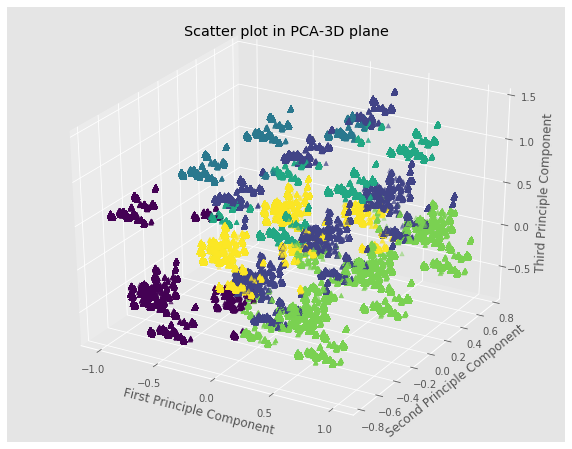

In [133]:
plot_3D_kmeans(re_X_3,y,"First Principle Component","Second Principle Component","Third Principle Component",'Scatter plot in PCA-3D plane')

In [57]:
def count_rows(x):
    return len(x)

In [136]:
calls_fe.groupby('clustering_6d').apply(count_rows) * 1.0 /calls_fe.shape[0]

clustering_6d
0    0.186599
1    0.141515
2    0.155827
3    0.144144
4    0.200390
5    0.171526
dtype: float64

### Interpretation on Kmeans clusters for calls

In [144]:
non_scaled_centers = pcd.inverse_transform(centers)

In [ ]:
# scaler = StandardScaler().fit(calls_fe.iloc[:,:-1])

In [ ]:
# engineered_centers = scaler.inverse_transform(scaled_centers)

In [138]:
centers

array([[-0.73520466, -0.70587104,  0.09731734, -0.01857897],
       [ 0.28405657, -0.00167116,  0.58971398,  0.95475739],
       [-0.83505578,  0.39319028,  0.62819994, -0.20247248],
       [ 0.5013606 , -0.0304876 ,  0.85005177, -0.56138681],
       [ 0.75311621, -0.04861423, -0.24373982, -0.25103722],
       [-0.60352889,  0.37545062, -0.42232071,  0.11475861]])

In [145]:
center_person = pd.DataFrame(non_scaled_centers,columns=calls_fe.columns[:-1])

In [146]:
center_person.transpose()

,0,1,2,3,4,5
common_loc_bool,0.037936,0.559438,0.037941,0.057804,0.055315,0.041593
is_Common Location,0.037936,0.559438,0.037941,0.057804,0.055315,0.041593
crime_type_Passing Call,0.026897,0.625809,0.034243,0.161432,0.146929,0.025416
crime_type_Traffic Stop,-0.008359,-0.082871,0.000922,0.275358,0.264443,-0.015255
crime_type_Suspicious Person,0.042128,0.018912,0.046583,0.075600,0.068046,0.038521
crime_type_Homeless Complaint,0.058813,0.032990,0.076334,0.076221,0.039059,0.040260
disposition_HAN,0.216493,0.878544,0.238537,0.239750,0.186655,0.195556
disposition_GOA,0.208022,-0.029097,0.198792,0.070984,0.085363,0.211958
disposition_CIT,0.093871,-0.099635,0.109938,0.233585,0.206105,0.078967
disposition_ADV,0.084149,-0.034276,0.086874,0.167852,0.165390,0.081647


In [ ]:
def plot_radar(df, figname=None, dpi=64, category=False, num_of_cat=False,ylim=(0,1)):
    '''plot spider graph to interpret clustering results
    INPUT - df: cluster number as index'''
    # initialize the figure
    my_dpi = dpi
    plt.figure(figsize=(1333/my_dpi,900/my_dpi), dpi=my_dpi)
    # plt.tight_layout()

    # Create a color palette:
    my_palette = plt.cm.get_cmap("Set1", len(df.index))

    for row in range(0, len(df.index)):
        make_spider(df=df, row=row, title='group{}'.format(
            row), color=my_palette(row), category=category, num_of_cat=num_of_cat,ylim=ylim)
    if figname != None:
        plt.savefig('{}.png'.format(figname))

# Incidents Data

In [8]:
incidents = pd.read_csv('police-department-incidents.csv',parse_dates=['Date'])
incidents.columns = [col.strip() for col in incidents.columns] 

In [9]:
print(incidents.shape)
incidents.head()

(2215024, 13)


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,180362289,VEHICLE THEFT,STOLEN MOTORCYCLE,Tuesday,2018-05-15,10:30,SOUTHERN,NONE,700 Block of TEHAMA ST,-122.411912,37.775207,"{'type': 'Point', 'coordinates': [-122.4119120...",18036228907023
1,180360948,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Tuesday,2018-05-15,04:14,SOUTHERN,NONE,MARKET ST / SOUTH VAN NESS AV,-122.419258,37.775146,"{'type': 'Point', 'coordinates': [-122.4192578...",18036094864020
2,180360879,OTHER OFFENSES,PAROLE VIOLATION,Tuesday,2018-05-15,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.417813,37.757101,"{'type': 'Point', 'coordinates': [-122.4178125...",18036087926150
3,180360879,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Tuesday,2018-05-15,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.417813,37.757101,"{'type': 'Point', 'coordinates': [-122.4178125...",18036087965010
4,180360879,OTHER OFFENSES,TRAFFIC VIOLATION,Tuesday,2018-05-15,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.417813,37.757101,"{'type': 'Point', 'coordinates': [-122.4178125...",18036087965015


In [10]:
incidents['year'] = incidents['Date'].apply(lambda x: x.year)

In [11]:
incidents['month'] = incidents['Date'].apply(lambda x: x.month)

In [12]:
incidents['day_of_month'] = incidents['Date'].apply(lambda x: x.day)

In [13]:
incidents['hour'] = incidents['Time'].apply(lambda x: int(x[:2]))

In [14]:
incidents['week'] = incidents['Date'].apply(lambda x: x.week)

In [ ]:
# from uszipcode import Zipcode

In [ ]:
# from uszipcode import SearchEngine

In [ ]:
# search = SearchEngine(simple_zipcode=False)

In [ ]:
# results = search.by_coordinates(39.122229, -77.133578, radius=30, returns=5)

In [ ]:
# import geopy

In [ ]:
# from geopy.point import Point

In [ ]:
# def get_zipcode(df, geolocator, lat_field, lon_field):
#     location = geolocator.reverse(Point(df[lat_field], df[lon_field]))
#     if 'postcode' in list(location.raw['address'].keys()):
#         return location.raw['address']['postcode']
#     else:
#         return 'NA'

In [ ]:
# geolocator = geopy.Nominatim(user_agent='my-application',timeout = 100)

In [ ]:
# zipcodes = df.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='Lat', lon_field='Lon')

#### We have visibility from 2003 to 2018 crime records. 

- Are these records complete and continous?
- Are categories consistent across all years?


In [177]:
print(incidents['Date'].max())
print(incidents['Date'].min())

2018-05-15 00:00:00
2003-01-01 00:00:00


In [15]:
day_of_week_convert = {'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}

In [16]:
incidents['day_of_week_int'] = incidents['DayOfWeek'].replace(day_of_week_convert)

In [17]:
incidents.loc[incidents['day_of_month'] == 1, 'day_of_month_cat'] = 'month_start'

In [18]:
incidents.loc[incidents['day_of_month'].apply(lambda x: x in (29,30,31)), 'day_of_month_cat'] = 'month_end_three'

In [19]:
incidents.loc[incidents['day_of_month'] == 15, 'day_of_month_cat'] = 'mid_month'

In [20]:
incidents['day_of_month_cat'] = incidents['day_of_month_cat'].fillna('other_dates')

In [21]:
incidents['day_of_month_cat'].value_counts()

other_dates        1878741
month_end_three     175117
month_start          85912
mid_month            75254
Name: day_of_month_cat, dtype: int64

In [22]:
hours_to_cat_incidents = {"hour":{1:"late_night",2:"late_night",3:"late_night",4:"late_night",5:"late_night",6:"late_night",
                                 7:"day",8:"day",9:"day",10:"day",11:"day",12:"day",13:"day",14:"day",15:"day",
                                  16:"late_afternoon",17:"late_afternoon",18:"late_afternoon",19:"late_afternoon",
                             20:"evening",21:"evening",22:"evening",23: "evening", 24: "evening"
                            }}

In [23]:
incidents.replace(hours_to_cat_incidents, inplace=True);

In [24]:
incidents['hour_int'] = incidents['Time'].apply(lambda x: int(x[:2]))

In [25]:
incidents.isnull().sum()

IncidntNum          0
Category            0
Descript            0
DayOfWeek           0
Date                0
Time                0
PdDistrict          1
Resolution          0
Address             0
X                   0
Y                   0
Location            0
PdId                0
year                0
month               0
day_of_month        0
hour                0
week                0
day_of_week_int     0
day_of_month_cat    0
hour_int            0
dtype: int64

In [26]:
incidents = incidents.dropna() #only 1 record

In [27]:
incidents.shape

(2215023, 21)

## Incidents EDA

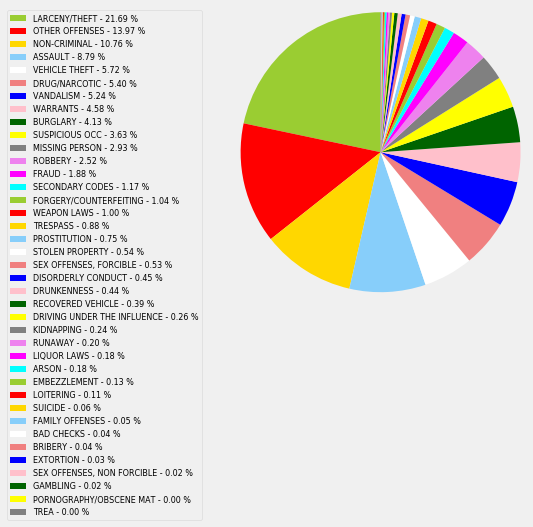

In [217]:
x = incidents['Category'].value_counts().index
y = incidents['Category'].value_counts()

colors = ['yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)


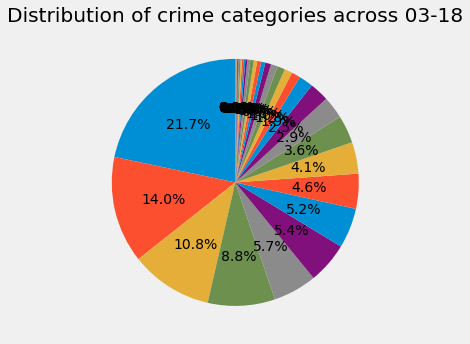

In [215]:
figure =figsize(10,5)
plt.pie(incidents['Category'].value_counts(),autopct='%1.1f%%',startangle=90);
# xticks(rotation = '90');
plt.title("Distribution of crime categories across 03-18")
plt.tight_layout()

In [186]:
#### Across all years, top 4 crime categories take 55% of all records. Top 13 categories take 91% of all records.
sum(incidents['Category'].value_counts()[:4]) *1.0 /sum(incidents['Category'].value_counts())

0.5520585781463316

In [187]:
incidents['Category'].value_counts()[:13]

LARCENY/THEFT     480448
OTHER OFFENSES    309358
NON-CRIMINAL      238323
ASSAULT           194694
VEHICLE THEFT     126602
DRUG/NARCOTIC     119628
VANDALISM         116059
WARRANTS          101379
BURGLARY           91543
SUSPICIOUS OCC     80444
MISSING PERSON     64961
ROBBERY            55867
FRAUD              41542
Name: Category, dtype: int64

In [188]:
sum (incidents['Category'].value_counts()[:13]) * 1.0 / sum(incidents['Category'].value_counts())

0.912336841496977

#### How are crimes categories trending over the years?  

**From heatmap overview on Top13 categories** 
- Theft has increased significantly over the years
- Non-criminal has increased 

- Vehicle theft as decreased over the years


## Separate incidents into: 
- crimes
- non-crimes

- And create a subgroup Thefts as the biggest crime

In [28]:
crimes = incidents[incidents['Category']!= 'NON-CRIMINAL']

In [29]:
crimes.shape

(1976700, 21)

In [30]:
crimes.shape[0]*1.0/incidents.shape[0]

0.8924060833679831

In [31]:
thefts = crimes[crimes['Category'] == 'LARCENY/THEFT']

In [32]:
thefts.shape

(480447, 21)

In [33]:
thefts.shape[0]/crimes.shape[0]

0.2430550918196995

In [176]:
# zipcodes = thefts[['X','Y']].apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='Y', lon_field='X')

In [34]:
top_categories = list(incidents['Category'].value_counts()[:13].index)

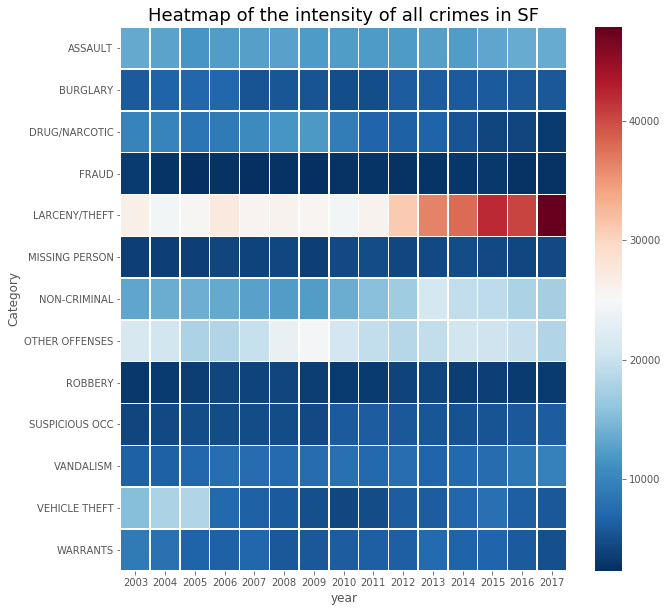

In [191]:
mask_year = incidents['year'] <= 2017
n_crime_year = incidents[mask_year][['Category', 'year']]
n_crime = n_crime_year[n_crime_year['Category'].apply(lambda x: x in top_categories)]
m = n_crime.groupby(['Category', 'year']).apply(lambda x: len(x)).unstack()
figure = figsize(10, 10)

sns.heatmap(m, cmap='RdBu_r', linewidth=0.5);
title('Heatmap of the intensity of all crimes in SF', fontsize = 18);

In [195]:
# #### What are inside Non-criminal(no.3) and Other offenses(no.2) ? 

# top_cat_inci = incidents[incidents['Category'].apply (lambda x: x in top_categories)]

# tmp = top_cat_inci[['Category','Descript']].groupby(['Category','Descript']).apply(lambda x: len(x)).unstack()

In [35]:
others = incidents[incidents['Category'] == 'OTHER OFFENSES']

In [226]:
others['Descript'].value_counts(1)

DRIVERS LICENSE, SUSPENDED OR REVOKED                  0.202141
TRAFFIC VIOLATION                                      0.123174
RESISTING ARREST                                       0.069415
MISCELLANEOUS INVESTIGATION                            0.065358
PROBATION VIOLATION                                    0.058444
                                                         ...   
PERMIT VIOLATION, ADVERTISING HANDBILL DISTRIBUTION    0.000003
UNSOLICITED FAX ADVERTISING                            0.000003
HAZARDOUS MATERIALS, STORE WITHOUT PERMIT              0.000003
REFUSAL TO IDENTIFY                                    0.000003
VIOLATION OF CALIF UNEMPLOYMENT INSURANCE ACT          0.000003
Name: Descript, Length: 179, dtype: float64

In [228]:
thefts['Descript'].value_counts(1)[:10]

GRAND THEFT FROM LOCKED AUTO      0.372228
PETTY THEFT FROM LOCKED AUTO      0.108120
PETTY THEFT OF PROPERTY           0.095981
GRAND THEFT OF PROPERTY           0.061235
PETTY THEFT FROM A BUILDING       0.053550
PETTY THEFT SHOPLIFTING           0.050948
GRAND THEFT FROM A BUILDING       0.046838
GRAND THEFT FROM PERSON           0.037713
GRAND THEFT FROM UNLOCKED AUTO    0.032309
GRAND THEFT PICKPOCKET            0.028411
Name: Descript, dtype: float64

In [ ]:
crimes = crimes.reset_index(drop=True)

In [36]:
non_criminals = incidents[incidents['Category']== 'NON-CRIMINAL']

## Non-Criminals deep dive

In [197]:
non_criminals['Descript'].value_counts(1)

LOST PROPERTY                                         0.327102
AIDED CASE, MENTAL DISTURBED                          0.236289
FOUND PROPERTY                                        0.140075
AIDED CASE                                            0.059793
DEATH REPORT, CAUSE UNKNOWN                           0.045044
CASE CLOSURE                                          0.025264
STAY AWAY OR COURT ORDER, NON-DV RELATED              0.018089
AIDED CASE, DOG BITE                                  0.014866
CIVIL SIDEWALKS, CITATION                             0.012756
PROPERTY FOR IDENTIFICATION                           0.011652
AIDED CASE, INJURED PERSON                            0.011279
COURTESY REPORT                                       0.010347
DEATH REPORT, NATURAL CAUSES                          0.009810
CIVIL SIDEWALKS, WARNING                              0.009722
AIDED CASE -PROPERTY FOR DESTRUCTION                  0.009722
FIRE REPORT                                           0

In [198]:
top_non_criminals_types = list((non_criminals['Descript'].value_counts(1)[:5]).index)

In [199]:
non_criminals_major = non_criminals[non_criminals['Descript'].apply(lambda x: x in top_non_criminals_types)]

In [200]:
non_criminals_major.shape[0]/non_criminals.shape[0]

0.8083021781363947

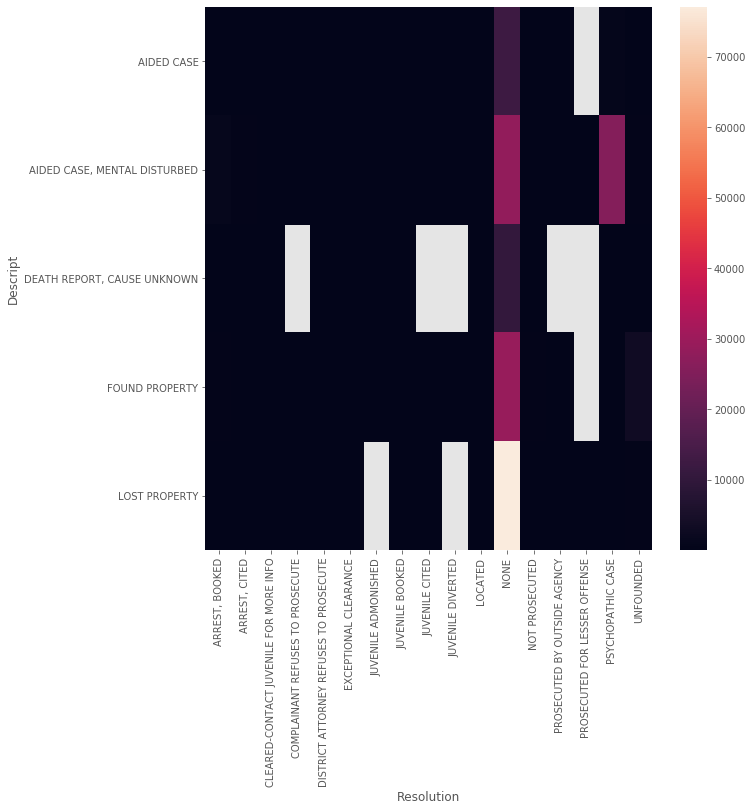

In [201]:
sns.heatmap(non_criminals_major.groupby(['Descript','Resolution']).apply(count_rows).unstack())

In [209]:
t = non_criminals_major.groupby(['Descript','year']).apply(count_rows).unstack()

In [213]:
t.reset_index(inplace=True)

In [220]:
t.reset_index(inplace=True)

In [221]:
t.index

RangeIndex(start=0, stop=5, step=1)

In [223]:
t.plot.bar(x='year',y='Descript', stacked = True,alpha = 0.7)
legend();

KeyError: 'year'

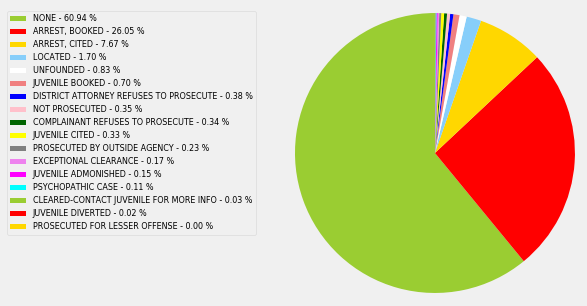

In [218]:
x = crimes['Resolution'].value_counts().index
y = crimes['Resolution'].value_counts()

colors = ['yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)


Text(0.5, 1.0, 'Distribution of resolutions for crimes across 03-18')

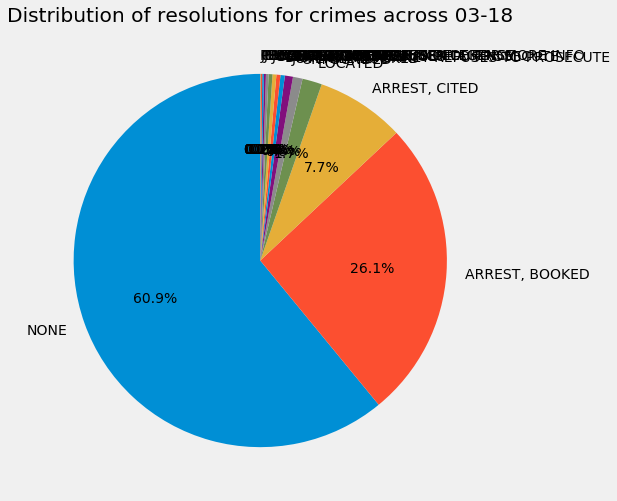

In [594]:
plt.pie(crimes['Resolution'].value_counts(1), labels = crimes['Resolution'].value_counts().index,autopct='%1.1f%%',startangle=90);
plt. title ('Distribution of resolutions for crimes across 03-18')

Text(0.5, 1.0, "Distribution of Day_of_week for SF crimes '03-'18")

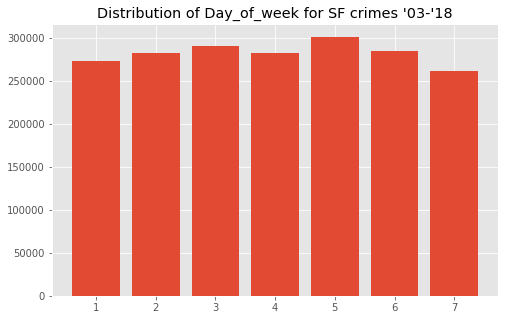

In [237]:
figure = figsize(8,5)
plt.bar(crimes['day_of_week_int'].value_counts().index,crimes['day_of_week_int'].value_counts());
plt.title("Distribution of Day_of_week for SF crimes '03-'18")

Text(0.5, 1.0, "Distribution of Hour_of_Day for SF crimes '03-'18")

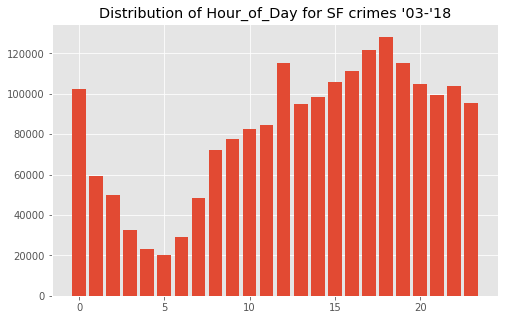

In [239]:
plt.bar(crimes['hour'].value_counts().index,crimes['hour'].value_counts());
plt.title("Distribution of Hour_of_Day for SF crimes '03-'18")

In [ ]:
# hours_to_cat = {"call_hour":{1:"late_night",2:"late_night",3:"late_night",4:"late_night",5:"late_night",6:"late_night",
#                                  7:"day",8:"day",9:"day",10:"day",11:"day",12:"day",13:"day",14:"day",15:"day",
#                                   16:"late_afternoon",17:"late_afternoon",18:"late_afternoon",19:"late_afternoon",
#                              20:"evening",21:"evening",22:"evening",23: "evening", 24: "evening"
#                             }}

In [ ]:
# calls.replace(hours_to_cat, inplace=True);

In [ ]:
crimes.isnull().sum()

In [219]:
crimes['year']

0          2018
2          2018
3          2018
4          2018
5          2018
           ... 
2215019    2003
2215020    2003
2215021    2003
2215022    2003
2215023    2003
Name: year, Length: 1976700, dtype: int64

Text(0.5, 1.0, "Count of SF crimes 03'Jan -18'May")

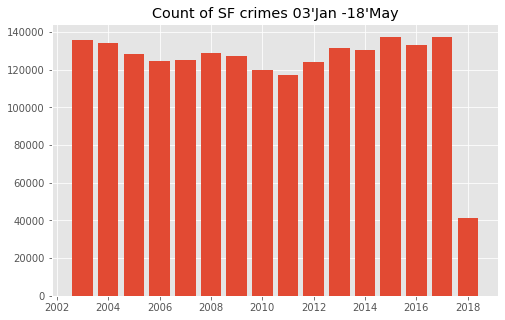

In [240]:
plt.bar(crimes['year'].value_counts().index,crimes['year'].value_counts())
plt.title("Count of SF crimes 03'Jan -18'May")

Text(0.5, 1.0, "Distribution of Day_of_Month for SF crimes 03'Jan -18'May")

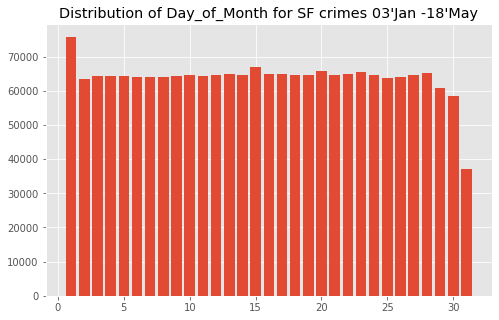

In [241]:
plt.bar(crimes['day_of_month'].value_counts().index, crimes['day_of_month'].value_counts());
plt.title("Distribution of Day_of_Month for SF crimes 03'Jan -18'May")

In [242]:
# crimes['month'].value_counts(1)

Text(0.5, 1.0, "Distribution of Month_of_Year for SF crimes 03'Jan -18'May")

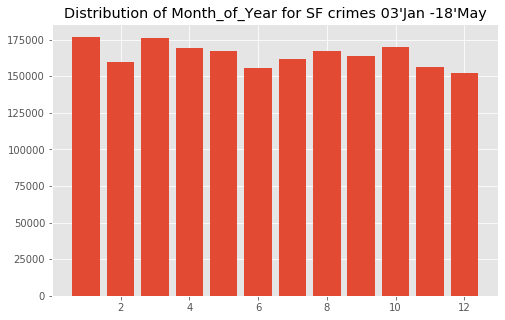

In [243]:
plt.bar(crimes['month'].value_counts().index,crimes['month'].value_counts());
plt.title("Distribution of Month_of_Year for SF crimes 03'Jan -18'May")

In [223]:
incidents['hour_int'].value_counts()

18    140918
17    135481
12    132631
19    126404
16    125548
15    120190
20    115010
22    113915
0     113096
14    112078
21    109559
13    108540
23    104731
11     97620
10     95469
9      89303
8      82459
1      65182
7      55551
2      54550
3      35596
6      33494
4      25285
5      22413
Name: hour_int, dtype: int64

In [225]:
incidents[incidents['hour_int'] == 12]['Category'].value_counts(1)

LARCENY/THEFT                  0.208986
OTHER OFFENSES                 0.152167
NON-CRIMINAL                   0.132330
ASSAULT                        0.079288
DRUG/NARCOTIC                  0.046882
SUSPICIOUS OCC                 0.045155
WARRANTS                       0.041484
VEHICLE THEFT                  0.041348
BURGLARY                       0.038166
FRAUD                          0.037887
VANDALISM                      0.034984
MISSING PERSON                 0.034660
FORGERY/COUNTERFEITING         0.025266
ROBBERY                        0.014800
SECONDARY CODES                0.011815
WEAPON LAWS                    0.008331
TRESPASS                       0.008120
STOLEN PROPERTY                0.005150
RECOVERED VEHICLE              0.004592
SEX OFFENSES, FORCIBLE         0.004531
EMBEZZLEMENT                   0.003883
PROSTITUTION                   0.003664
DISORDERLY CONDUCT             0.003039
DRUNKENNESS                    0.002149
KIDNAPPING                     0.001938


In [244]:
# crimes[crimes['Category'] != "OTHER OFFENSES"].shape[0]/incidents.shape[0]

In [245]:
crimes_ex_traffic = crimes[crimes['Category'] != "OTHER OFFENSES"]

In [247]:
crimes_ex_traffic['Category'].value_counts()

LARCENY/THEFT                  480448
ASSAULT                        194694
VEHICLE THEFT                  126602
DRUG/NARCOTIC                  119628
VANDALISM                      116059
WARRANTS                       101379
BURGLARY                        91543
SUSPICIOUS OCC                  80444
MISSING PERSON                  64961
ROBBERY                         55867
FRAUD                           41542
SECONDARY CODES                 25831
FORGERY/COUNTERFEITING          23050
WEAPON LAWS                     22234
TRESPASS                        19449
PROSTITUTION                    16701
STOLEN PROPERTY                 11891
SEX OFFENSES, FORCIBLE          11742
DISORDERLY CONDUCT              10040
DRUNKENNESS                      9826
RECOVERED VEHICLE                8716
DRIVING UNDER THE INFLUENCE      5672
KIDNAPPING                       5346
RUNAWAY                          4440
LIQUOR LAWS                      4083
ARSON                            3931
EMBEZZLEMENT

In [248]:
f = crimes_ex_traffic.groupby(['year','Category']).apply(count_rows).unstack()

In [249]:
f.reset_index(inplace=True)

In [250]:
f

Category,year,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,"SEX OFFENSES, NON FORCIBLE",STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,2003,293.0,13461.0,134.0,28.0,6047.0,886.0,289.0,9917.0,662.0,...,28.0,800.0,93.0,4196.0,NaN,1434.0,6448.0,15325.0,9079.0,1281.0
1,2004,280.0,12899.0,79.0,39.0,6753.0,814.0,244.0,9897.0,600.0,...,31.0,641.0,102.0,4489.0,NaN,1191.0,6496.0,17884.0,8114.0,1252.0
2,2005,231.0,11601.0,101.0,38.0,7071.0,687.0,196.0,8533.0,636.0,...,24.0,540.0,79.0,4693.0,NaN,1034.0,7013.0,18194.0,6708.0,1341.0
3,2006,240.0,12449.0,87.0,36.0,7004.0,521.0,266.0,9069.0,703.0,...,29.0,575.0,86.0,4775.0,NaN,1102.0,7688.0,7291.0,6498.0,1324.0
4,2007,246.0,12518.0,69.0,56.0,5454.0,581.0,313.0,10560.0,671.0,...,39.0,527.0,111.0,4800.0,NaN,1198.0,7566.0,6460.0,7105.0,1318.0
5,2008,248.0,12681.0,78.0,49.0,5679.0,789.0,408.0,11648.0,710.0,...,20.0,518.0,100.0,4751.0,NaN,1151.0,7342.0,6053.0,5798.0,1419.0
6,2009,222.0,12284.0,64.0,46.0,5379.0,956.0,579.0,11950.0,804.0,...,17.0,660.0,83.0,4627.0,NaN,1232.0,7604.0,5183.0,5764.0,1433.0
7,2010,209.0,12387.0,54.0,61.0,4966.0,827.0,458.0,9205.0,706.0,...,30.0,680.0,82.0,6004.0,2.0,1150.0,7934.0,4346.0,6187.0,1349.0
8,2011,203.0,12279.0,45.0,47.0,4987.0,762.0,470.0,6935.0,652.0,...,29.0,785.0,76.0,6207.0,NaN,1072.0,7243.0,4762.0,6311.0,1329.0
9,2012,237.0,12181.0,49.0,64.0,6243.0,704.0,421.0,6444.0,644.0,...,28.0,932.0,86.0,5860.0,2.0,1288.0,7808.0,6183.0,6300.0,1455.0


In [251]:
ten_top_crimes = crimes_ex_traffic['Category'].value_counts()[:10].index

In [252]:
ten_top_crimes

Index(['LARCENY/THEFT', 'ASSAULT', 'VEHICLE THEFT', 'DRUG/NARCOTIC',
       'VANDALISM', 'WARRANTS', 'BURGLARY', 'SUSPICIOUS OCC', 'MISSING PERSON',
       'ROBBERY'],
      dtype='object')

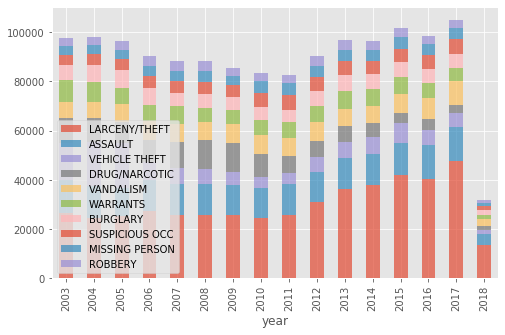

In [253]:
f.plot.bar(x='year',y=ten_top_crimes, stacked = True,alpha = 0.7)
legend();

### Feature engineering on Incidents data

In [315]:
incidents.head().transpose()

,0,1,2,3,4
IncidntNum,180362289,180360948,180360879,180360879,180360879
Category,VEHICLE THEFT,NON-CRIMINAL,OTHER OFFENSES,OTHER OFFENSES,OTHER OFFENSES
Descript,STOLEN MOTORCYCLE,"AIDED CASE, MENTAL DISTURBED",PAROLE VIOLATION,TRAFFIC VIOLATION ARREST,TRAFFIC VIOLATION
DayOfWeek,Tuesday,Tuesday,Tuesday,Tuesday,Tuesday
Date,2018-05-15 00:00:00,2018-05-15 00:00:00,2018-05-15 00:00:00,2018-05-15 00:00:00,2018-05-15 00:00:00
Time,10:30,04:14,02:01,02:01,02:01
PdDistrict,SOUTHERN,SOUTHERN,MISSION,MISSION,MISSION
Resolution,NONE,NONE,"ARREST, BOOKED","ARREST, BOOKED","ARREST, BOOKED"
Address,700 Block of TEHAMA ST,MARKET ST / SOUTH VAN NESS AV,CAPP ST / 21ST ST,CAPP ST / 21ST ST,CAPP ST / 21ST ST
X,-122.412,-122.419,-122.418,-122.418,-122.418


In [37]:
inci_calls_dummy_features = ['hour','DayOfWeek','day_of_month_cat','PdDistrict']

In [43]:
incidents_fe = dummify(incidents, inci_calls_dummy_features)

In [44]:
incidents_fe.head().transpose()

,0,1,2,3,4
IncidntNum,180362289,180360948,180360879,180360879,180360879
Category,VEHICLE THEFT,NON-CRIMINAL,OTHER OFFENSES,OTHER OFFENSES,OTHER OFFENSES
Descript,STOLEN MOTORCYCLE,"AIDED CASE, MENTAL DISTURBED",PAROLE VIOLATION,TRAFFIC VIOLATION ARREST,TRAFFIC VIOLATION
DayOfWeek,Tuesday,Tuesday,Tuesday,Tuesday,Tuesday
Date,2018-05-15 00:00:00,2018-05-15 00:00:00,2018-05-15 00:00:00,2018-05-15 00:00:00,2018-05-15 00:00:00
Time,10:30,04:14,02:01,02:01,02:01
PdDistrict,SOUTHERN,SOUTHERN,MISSION,MISSION,MISSION
Resolution,NONE,NONE,"ARREST, BOOKED","ARREST, BOOKED","ARREST, BOOKED"
Address,700 Block of TEHAMA ST,MARKET ST / SOUTH VAN NESS AV,CAPP ST / 21ST ST,CAPP ST / 21ST ST,CAPP ST / 21ST ST
X,-122.412,-122.419,-122.418,-122.418,-122.418


In [47]:
inci_useless_cols = ['IncidntNum','PdId']
inci_engineered_cols = ['DayOfWeek','Time','hour',
                   'day_of_month_cat','PdDistrict']
inci_unused_col = ['Location','X','Y','Resolution','Address']
inci_drop_features = inci_useless_cols + inci_engineered_cols + inci_unused_col

In [48]:
incidents_fe = drop_cols(incidents_fe, inci_drop_features)

In [49]:
incidents_fe.head()

,Category,Descript,Date,year,month,day_of_month,week,day_of_week_int,hour_int,hour_day,...,day_of_month_cat_other_dates,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,VEHICLE THEFT,STOLEN MOTORCYCLE,2018-05-15,2018,5,15,20,1,10,1,...,0,0,0,0,0,0,0,1,0,0
1,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",2018-05-15,2018,5,15,20,1,4,0,...,0,0,0,0,0,0,0,1,0,0
2,OTHER OFFENSES,PAROLE VIOLATION,2018-05-15,2018,5,15,20,1,2,0,...,0,0,0,1,0,0,0,0,0,0
3,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2018-05-15,2018,5,15,20,1,2,0,...,0,0,0,1,0,0,0,0,0,0
4,OTHER OFFENSES,TRAFFIC VIOLATION,2018-05-15,2018,5,15,20,1,2,0,...,0,0,0,1,0,0,0,0,0,0


## Thefts forecasting

In [50]:
incidents_fe.head()

,Category,Descript,Date,year,month,day_of_month,week,day_of_week_int,hour_int,hour_day,...,day_of_month_cat_other_dates,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,VEHICLE THEFT,STOLEN MOTORCYCLE,2018-05-15,2018,5,15,20,1,10,1,...,0,0,0,0,0,0,0,1,0,0
1,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",2018-05-15,2018,5,15,20,1,4,0,...,0,0,0,0,0,0,0,1,0,0
2,OTHER OFFENSES,PAROLE VIOLATION,2018-05-15,2018,5,15,20,1,2,0,...,0,0,0,1,0,0,0,0,0,0
3,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2018-05-15,2018,5,15,20,1,2,0,...,0,0,0,1,0,0,0,0,0,0
4,OTHER OFFENSES,TRAFFIC VIOLATION,2018-05-15,2018,5,15,20,1,2,0,...,0,0,0,1,0,0,0,0,0,0


In [70]:
thefts_fe = incidents_fe[incidents_fe['Category'] == 'ASSAULT']

In [71]:
thefts_fe.shape

(194694, 31)

In [72]:
thefts_fe.head()

,Category,Descript,Date,year,month,day_of_month,week,day_of_week_int,hour_int,hour_day,...,day_of_month_cat_other_dates,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
13,ASSAULT,BATTERY,2018-05-14,2018,5,14,20,0,21,0,...,1,0,0,0,0,0,0,1,0,0
21,ASSAULT,BATTERY,2018-05-14,2018,5,14,20,0,19,0,...,1,0,0,0,0,1,0,0,0,0
26,ASSAULT,THREATS AGAINST LIFE,2018-05-14,2018,5,14,20,0,17,0,...,1,0,0,1,0,0,0,0,0,0
29,ASSAULT,"BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP",2018-05-14,2018,5,14,20,0,17,0,...,1,0,0,0,0,0,0,1,0,0
40,ASSAULT,CHILD ABUSE (PHYSICAL),2018-05-14,2018,5,14,20,0,15,1,...,1,0,0,1,0,0,0,0,0,0


In [73]:
thefts_fe = drop_cols(thefts_fe, ['Descript','Category'])

In [74]:
thefts_fe.head()

,Date,year,month,day_of_month,week,day_of_week_int,hour_int,hour_day,hour_evening,hour_late_afternoon,...,day_of_month_cat_other_dates,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
13,2018-05-14,2018,5,14,20,0,21,0,1,0,...,1,0,0,0,0,0,0,1,0,0
21,2018-05-14,2018,5,14,20,0,19,0,0,1,...,1,0,0,0,0,1,0,0,0,0
26,2018-05-14,2018,5,14,20,0,17,0,0,1,...,1,0,0,1,0,0,0,0,0,0
29,2018-05-14,2018,5,14,20,0,17,0,0,1,...,1,0,0,0,0,0,0,1,0,0
40,2018-05-14,2018,5,14,20,0,15,1,0,0,...,1,0,0,1,0,0,0,0,0,0


In [75]:
daily_thefts = thefts_fe.groupby('Date').apply(count_rows).reset_index()

In [76]:
daily_thefts = daily_thefts.set_index('Date')

In [77]:
daily_thefts

,0
Date,
2003-01-01,96
2003-01-02,33
2003-01-03,36
2003-01-04,36
2003-01-05,44
...,...
2018-05-10,30
2018-05-11,31
2018-05-12,32


In [91]:
daily_thefts.columns = ['assault_counts']

In [92]:
daily_thefts.index

DatetimeIndex(['2003-01-01', '2003-01-02', '2003-01-03', '2003-01-04',
               '2003-01-05', '2003-01-06', '2003-01-07', '2003-01-08',
               '2003-01-09', '2003-01-10',
               ...
               '2018-05-05', '2018-05-06', '2018-05-07', '2018-05-08',
               '2018-05-09', '2018-05-10', '2018-05-11', '2018-05-12',
               '2018-05-13', '2018-05-14'],
              dtype='datetime64[ns]', name='Date', length=5610, freq=None)

In [93]:
daily_thefts

,assault_counts
Date,
2003-01-01,96
2003-01-02,33
2003-01-03,36
2003-01-04,36
2003-01-05,44
...,...
2018-05-10,30
2018-05-11,31
2018-05-12,32


In [94]:
y = daily_thefts['assault_counts'].resample('1W').sum()

In [95]:
y

Date
2003-01-05    245
2003-01-12    245
2003-01-19    249
2003-01-26    262
2003-02-02    250
             ... 
2018-04-22    265
2018-04-29    266
2018-05-06    209
2018-05-13    211
2018-05-20     10
Freq: W-SUN, Name: assault_counts, Length: 803, dtype: int64

In [96]:
y = y[:-2] #remove weeks that is not full

Text(0.5, 1.0, 'Time series of weekly assults in SF')

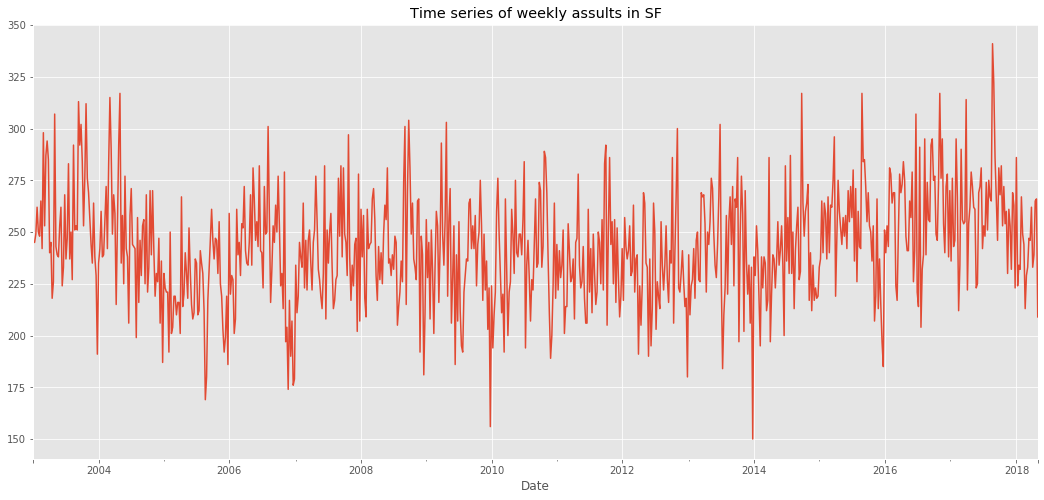

In [97]:
y.plot();
plt.title("Time series of weekly assults in SF")

In [86]:
import statsmodels.api as sm

In [87]:
from pylab import rcParams

In [88]:
rcParams['figure.figsize'] = 18, 8

In [99]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')

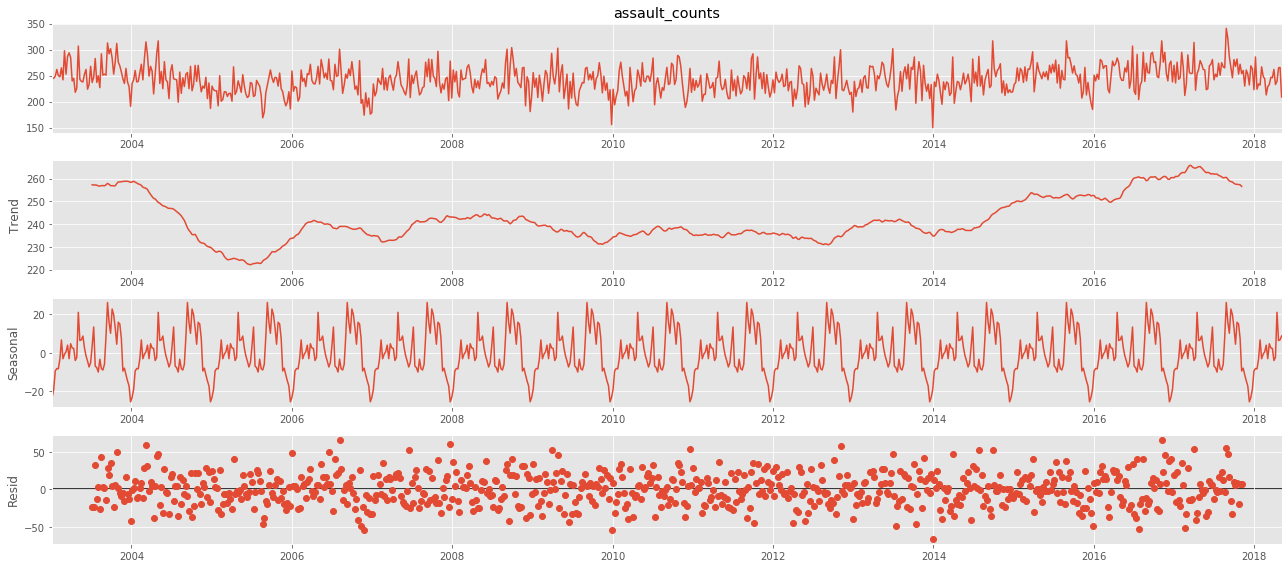

In [100]:
fig = decomposition.plot()
plt.show()

In [101]:
import itertools

In [103]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2],54) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))



Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 54)
SARIMAX: (0, 0, 1) x (0, 1, 0, 54)
SARIMAX: (0, 1, 0) x (0, 1, 1, 54)
SARIMAX: (0, 1, 0) x (1, 0, 0, 54)


In [104]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 54)12 - AIC:11069.358628148482
ARIMA(0, 0, 0)x(0, 0, 1, 54)12 - AIC:9558.58132648985
ARIMA(0, 0, 0)x(0, 1, 0, 54)12 - AIC:7453.762662590452
ARIMA(0, 0, 0)x(0, 1, 1, 54)12 - AIC:6622.785488812167
ARIMA(0, 0, 0)x(1, 0, 0, 54)12 - AIC:7460.8652628874615
ARIMA(0, 0, 0)x(1, 0, 1, 54)12 - AIC:7166.586185094165
ARIMA(0, 0, 0)x(1, 1, 0, 54)12 - AIC:6713.158361113636
ARIMA(0, 0, 0)x(1, 1, 1, 54)12 - AIC:6619.8820412237965
ARIMA(0, 0, 1)x(0, 0, 0, 54)12 - AIC:10150.660113098327
ARIMA(0, 0, 1)x(0, 0, 1, 54)12 - AIC:8916.330229835312
ARIMA(0, 0, 1)x(0, 1, 0, 54)12 - AIC:7422.883866728618
ARIMA(0, 0, 1)x(0, 1, 1, 54)12 - AIC:6573.628982138735
ARIMA(0, 0, 1)x(1, 0, 0, 54)12 - AIC:7437.599464483827
ARIMA(0, 0, 1)x(1, 0, 1, 54)12 - AIC:7113.431929933936
ARIMA(0, 0, 1)x(1, 1, 0, 54)12 - AIC:6691.867170672811
ARIMA(0, 0, 1)x(1, 1, 1, 54)12 - AIC:6574.417387099093
ARIMA(0, 1, 0)x(0, 0, 0, 54)12 - AIC:7781.434765242626
ARIMA(0, 1, 0)x(0, 0, 1, 54)12 - AIC:7259.662796136364
ARIMA(0

In [480]:
# ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:8298.625757212361

In [105]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 53),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1255      0.043      2.908      0.004       0.041       0.210
ma.L1         -0.9412      0.015    -62.338      0.000      -0.971      -0.912
ma.S.L53      -1.1541      0.053    -21.762      0.000      -1.258      -1.050
sigma2       488.9619     45.659     10.709      0.000     399.473     578.451


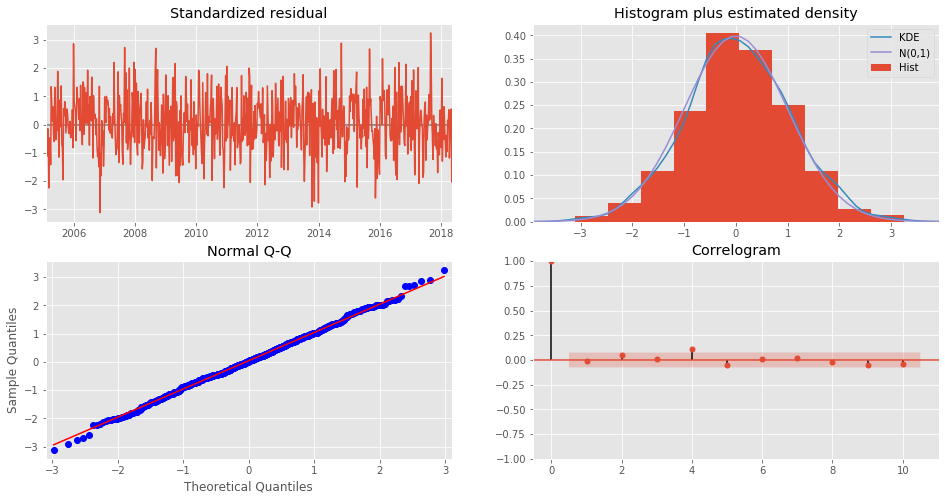

In [106]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [107]:
y.tail(21)

Date
2017-12-17    269
2017-12-24    263
2017-12-31    223
2018-01-07    286
2018-01-14    224
2018-01-21    234
2018-01-28    232
2018-02-04    267
2018-02-11    249
2018-02-18    244
2018-02-25    213
2018-03-04    229
2018-03-11    233
2018-03-18    247
2018-03-25    246
2018-04-01    262
2018-04-08    233
2018-04-15    239
2018-04-22    265
2018-04-29    266
2018-05-06    209
Freq: W-SUN, Name: assault_counts, dtype: int64

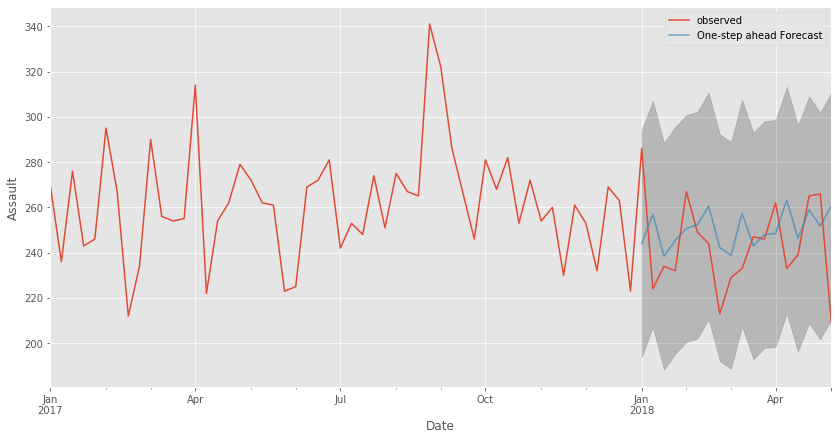

In [113]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-07'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Assault')
plt.legend()
plt.show()

In [109]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-07':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 513.36


In [110]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 22.66


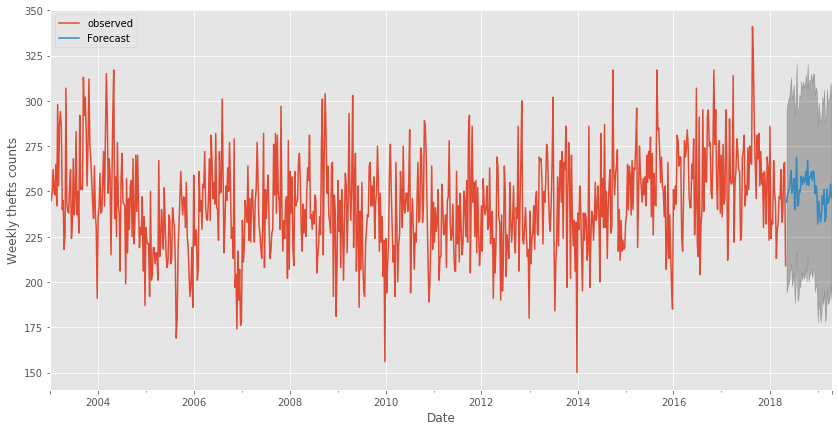

In [112]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Weekly thefts counts')
plt.legend()
plt.show()

## Auto Thefts regression

In [511]:
from sklearn.model_selection import train_test_split

In [531]:
incidents_fe['is_auto_crime'] = np.where(incidents_fe['Descript'].str.contains('AUTO','THEFT'),1,0)

In [532]:
incidents_fe['is_auto_crime'].value_counts(1)

0    0.845634
1    0.154366
Name: is_auto_crime, dtype: float64

In [533]:
incidents_fe[incidents_fe['is_auto_crime'] == 1]['Descript'].value_counts(1)

GRAND THEFT FROM LOCKED AUTO                            0.523027
STOLEN AUTOMOBILE                                       0.189407
PETTY THEFT FROM LOCKED AUTO                            0.151922
VEHICLE, RECOVERED, AUTO                                0.049087
GRAND THEFT FROM UNLOCKED AUTO                          0.045399
PETTY THEFT FROM UNLOCKED AUTO                          0.020200
FRAUDULENT USE OF AUTOMATED TELLER CARD                 0.010950
GRAND THEFT AUTO STRIP                                  0.004048
PETTY THEFT AUTO STRIP                                  0.003624
SUSPICIOUS AUTO, POSSIBLY SEX                           0.001222
AUTO, GRAND THEFT OF                                    0.000515
ATTEMPTED AUTO STRIP                                    0.000401
DEATH, NON-MANSLAUGHTER AUTO ACCIDENT                   0.000091
AUTO IMPOUNDED                                          0.000070
ASSAULT, AGGRAVATED, W/ SEMI AUTO                       0.000032
ASSAULT, AGGRAVATED, ON P

In [534]:
incidents_fe.head()

,Category,Descript,Date,year,month,day_of_month,day_of_week_int,hour_int,hour_day,hour_evening,...,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,PdDistrict_nan,is_auto_crime
0,VEHICLE THEFT,STOLEN MOTORCYCLE,2018-05-15,2018,5,15,1,10,1,0,...,0,0,0,0,0,1,0,0,0,0
1,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",2018-05-15,2018,5,15,1,4,0,0,...,0,0,0,0,0,1,0,0,0,0
2,OTHER OFFENSES,PAROLE VIOLATION,2018-05-15,2018,5,15,1,2,0,0,...,0,1,0,0,0,0,0,0,0,0
3,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2018-05-15,2018,5,15,1,2,0,0,...,0,1,0,0,0,0,0,0,0,0
4,OTHER OFFENSES,TRAFFIC VIOLATION,2018-05-15,2018,5,15,1,2,0,0,...,0,1,0,0,0,0,0,0,0,0


In [513]:
inci_engineered_cols

['DayOfWeek', 'Time', 'day_of_month_cat', 'PdDistrict']

In [536]:
incidents_fe = incidents_fe.drop(['Date','year','month','day_of_month','day_of_week_int','hour_int','PdDistrict_nan'],axis=1)

In [537]:
incidents_fe.head()

,Category,Descript,hour_day,hour_evening,hour_late_afternoon,hour_late_night,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,...,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,is_auto_crime
0,VEHICLE THEFT,STOLEN MOTORCYCLE,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,OTHER OFFENSES,PAROLE VIOLATION,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,OTHER OFFENSES,TRAFFIC VIOLATION,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [538]:
incidents_fe = incidents_fe.drop(['Category','Descript'],axis=1)

In [540]:
incidents_fe.reset_index(drop=True,inplace=True)

In [542]:
y = incidents_fe['is_auto_crime']

In [543]:
y

0          0
1          0
2          0
3          0
4          0
          ..
2215019    0
2215020    0
2215021    0
2215022    0
2215023    0
Name: is_auto_crime, Length: 2215024, dtype: int64

In [544]:
y.shape

(2215024,)

In [546]:
X = incidents_fe.drop(['is_auto_crime'],axis=1).values

In [547]:
X.shape 

(2215024, 22)

In [548]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=19)

In [549]:
# from sklearn.preprocessing import StandardScaler

In [550]:
#  from sklearn.ensemble import GradientBoostingRegressor

In [551]:
def logisticModel(Xtrain, ytrain, X_test):
    # logReg = LogisticRegression()
    # fitted = logReg.fit(X, y)
    # predictedLogistic = cross_val_predict(LogisticRegression(), Xtrain, ytrain, cv=3,method='predict_proba')[:,1]
    lg = LogisticRegression()
    fit = lg.fit(Xtrain,ytrain)
    predictedLogistic = fit.predict_proba(X_test)[:,1]
    return predictedLogistic

In [559]:
def randomForestModel(Xtrain, ytrain,X_test):
    parameters = {'class_weight':[None],
                'max_depth': [2,4],
                'max_features': ['auto']
                }
    gscv = GridSearchCV(RandomForestClassifier(), parameters)
    fit = gscv.fit(Xtrain, ytrain)
    print('Best parameters for RF: {}'.format(fit.best_params_))
    predictedRF = fit.predict_proba(X_test)[:,1]
    return predictedRF

def GradientBoost(Xtrain, ytrain,X_test):
    parameters = {
                    'n_estimators':  [100,200]
                    }
    decisionTree = GradientBoostingClassifier()
    gscv = GridSearchCV(decisionTree, parameters,scoring = 'roc_auc')
    fit = gscv.fit(Xtrain, ytrain)
    print('Best parameters for GBM: {}'.format(fit.best_params_))
    predictedGradient = fit.predict_proba(X_test)[:,1]
    return predictedGradient

In [554]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder


In [560]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.ensemble.partial_dependence import plot_partial_dependence, partial_dependence

In [555]:
predictedLogistic = logisticModel(X_train, y_train, X_test)

In [557]:
predictedLogistic

array([0.11863187, 0.24597923, 0.29991787, ..., 0.09413112, 0.11930562,
       0.12128914])

In [561]:
predictedRF = randomForestModel(X_train, y_train, X_test)

Best parameters for RF: {'class_weight': None, 'max_depth': 2, 'max_features': 'auto'}


In [562]:
predictedGradient = GradientBoost(X_train,y_train, X_test)

Best parameters for GBM: {'learning_rate': 0.5, 'n_estimators': 200}


In [565]:
print("$ ROC Curves")
fpr_l, tpr_l, thresholds_l = roc_curve(y_test, predictedLogistic)
auc_score_l = auc(fpr_l, tpr_l)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, predictedRF)
auc_score_rf = auc(fpr_rf, tpr_rf)
fpr_g, tpr_g, thresholds_g = roc_curve(y_test, predictedGradient)
auc_score_g = auc(fpr_g, tpr_g)

$ ROC Curves


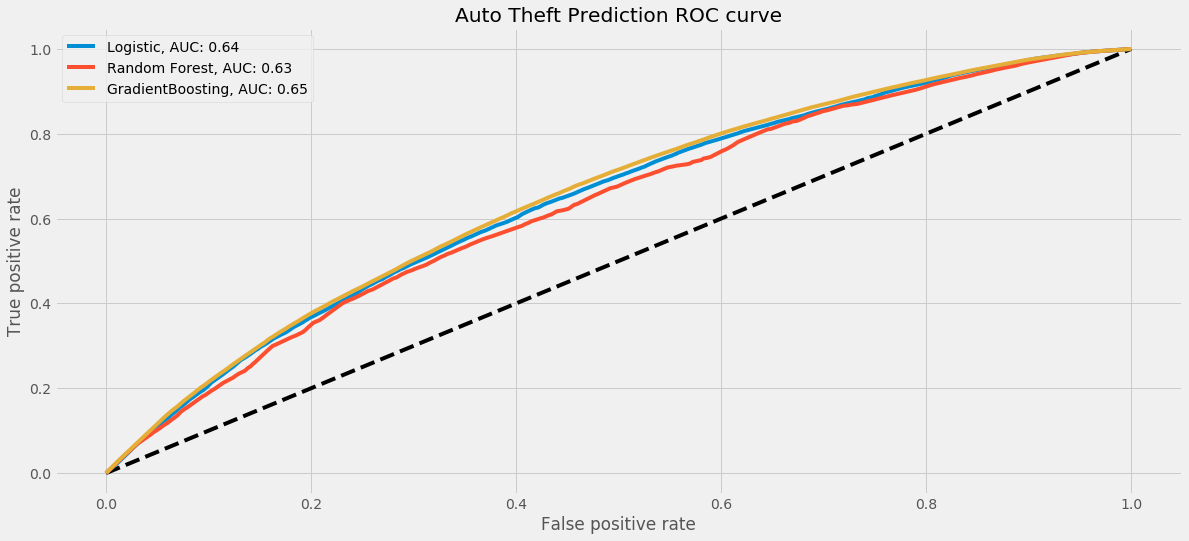

In [571]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_l, tpr_l, label= ('Logistic, AUC: {0:.2f}'.format(auc_score_l)))
plt.plot(fpr_rf, tpr_rf, label=('Random Forest, AUC: {0:.2f}'.format(auc_score_rf)))
plt.plot(fpr_g, tpr_g, label=('GradientBoosting, AUC: {0:.2f}'.format(auc_score_g)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('{} ROC curve'.format('Auto Theft Prediction'))
plt.legend(loc='best')
# plt.savefig('{} roc.png'.format('Auto Theft Prediction'))
# plt.close()

In [ ]:
# print("$ PDP Plots")
# clf = GradientBoostingClassifier(learning_rate=0.5, n_estimators=200, max_depth=3)
# fit = clf.fit(X, y)

# names = ['avg_dist_log', 'avg_rating_by_driver_log', 'avg_rating_of_driver_log',
# 'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct',
# "city_King's Landing", 'city_Winterfell', 'phone_iPhone',
# 'luxury_car_user_True', 'user_lifespan', 'user_rated_driver',
# 'user_rated_driver_avg_rating_of_driver', 'city_Astapor', 'phone_Android',
# 'luxury_car_user_False', 'avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver']

# features = [5,9,15,3,4,6,7,8,14,16,10,11,17,18,19]

# pdp = plt.figure(figsize=(16,8))
# # plt.title('{} Partial Dependency Plot'.format(n_days))
# fig, axs = plot_partial_dependence(fit, X, features, feature_names=names, n_jobs=2, grid_resolution=50)
# fig.set_size_inches(18,12)
# fig.tight_layout()
# fig.savefig('{} pdp.png'.format('Auto Theft'))
# # plt.close(pdp)

In [570]:
params = {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 2,
          'learning_rate': 0.10} #'loss': 'huber'

clf_gbr = GradientBoostingClassifier(**params)

clf_gbr.fit(X_train, y_train)

y_pred = clf_gbr.predict(X_test)

In [574]:
incidents_fe.shape

(2215024, 23)

In [582]:
tp = incidents_fe.drop(['is_auto_crime'],axis=1).columns

In [575]:
X.shape

(2215024, 22)

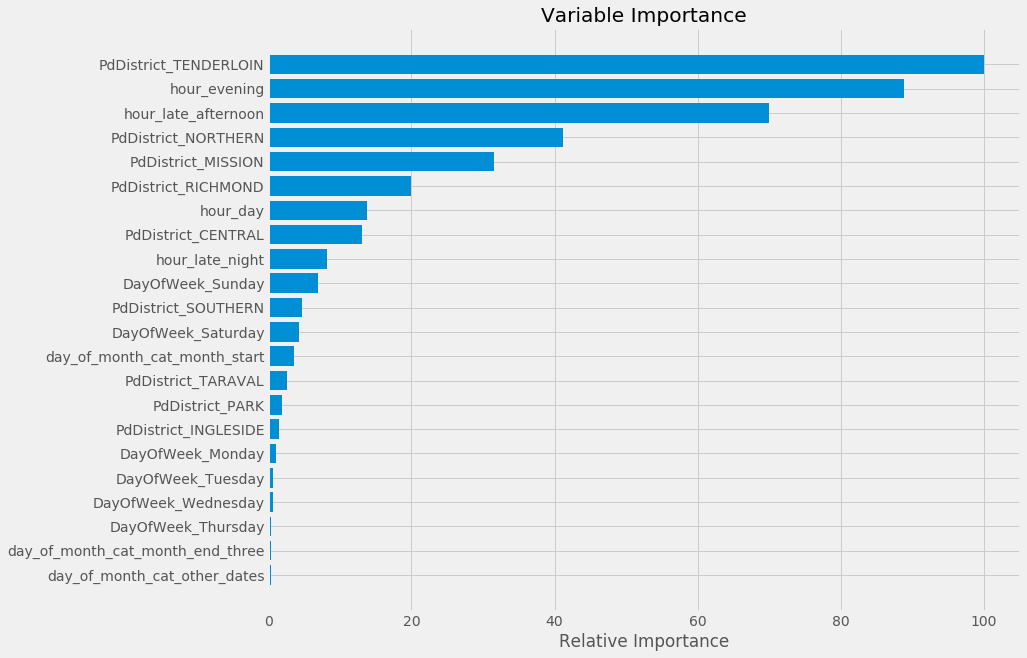

In [584]:
# Plot feature importance
feature_importance = clf_gbr.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(12, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, tp[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Auto Thefts regression

In [158]:
from sklearn.model_selection import train_test_split

In [165]:
incidents_fe[incidents_fe['Category'] == 'OTHER OFFENSES']['Descript'].value_counts(1)

DRIVERS LICENSE, SUSPENDED OR REVOKED                  0.202141
TRAFFIC VIOLATION                                      0.123174
RESISTING ARREST                                       0.069415
MISCELLANEOUS INVESTIGATION                            0.065358
PROBATION VIOLATION                                    0.058444
                                                         ...   
PERMIT VIOLATION, ADVERTISING HANDBILL DISTRIBUTION    0.000003
REFUSAL TO IDENTIFY                                    0.000003
HAZARDOUS MATERIALS, TRANSPORT WITHOUT PERMIT          0.000003
HAZARDOUS MATERIALS, STORE WITHOUT PERMIT              0.000003
UNSOLICITED FAX ADVERTISING                            0.000003
Name: Descript, Length: 179, dtype: float64

In [168]:
incidents_fe['is_traffic'] = np.where(incidents_fe['Descript'].str.contains('DRIVERS LICENSE'),1,0)

In [169]:
incidents_fe['is_traffic'].value_counts(1)

0    0.970265
1    0.029735
Name: is_traffic, dtype: float64

In [164]:
incidents_fe['is_assault'].value_counts(1)

0    0.912103
1    0.087897
Name: is_assault, dtype: float64

In [170]:
incidents_fe[incidents_fe['is_assault'] == 1]['Descript'].value_counts(1)

BATTERY                                                 0.347489
THREATS AGAINST LIFE                                    0.178074
INFLICT INJURY ON COHABITEE                             0.092186
AGGRAVATED ASSAULT WITH A DEADLY WEAPON                 0.084260
AGGRAVATED ASSAULT WITH BODILY FORCE                    0.064316
                                                          ...   
AGGRAVATED ASSAULT OF POLICE OFFICER, SNIPING           0.000010
ATTEMPTED HOMICIDE WITH EXPLOSIVES                      0.000010
ASSAULT, AGGRAVATED, ON POLICE OFFICER, W/ SEMI AUTO    0.000005
ATTEMPTED HOMICIDE BY SNIPING                           0.000005
ASSAULT, AGGRAVATED, ON POLICE OFFICER, W/ FULL AUTO    0.000005
Name: Descript, Length: 64, dtype: float64

In [172]:
incidents_fe.head()

,Category,Descript,Date,year,month,day_of_month,week,day_of_week_int,hour_int,hour_day,...,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,is_assault,is_traffic
0,VEHICLE THEFT,STOLEN MOTORCYCLE,2018-05-15,2018,5,15,20,1,10,1,...,0,0,0,0,0,1,0,0,0,0
1,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",2018-05-15,2018,5,15,20,1,4,0,...,0,0,0,0,0,1,0,0,0,0
2,OTHER OFFENSES,PAROLE VIOLATION,2018-05-15,2018,5,15,20,1,2,0,...,0,1,0,0,0,0,0,0,0,0
3,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2018-05-15,2018,5,15,20,1,2,0,...,0,1,0,0,0,0,0,0,0,0
4,OTHER OFFENSES,TRAFFIC VIOLATION,2018-05-15,2018,5,15,20,1,2,0,...,0,1,0,0,0,0,0,0,0,0


In [173]:
inci_engineered_cols

['DayOfWeek', 'Time', 'hour', 'day_of_month_cat', 'PdDistrict']

In [175]:
incidents_fe = incidents_fe.drop(['Date','year','month','day_of_month','day_of_week_int','hour_int'],axis=1)

In [177]:
incidents_fe.drop(['is_traffic'],axis=1,inplace=True)

In [178]:
incidents_fe.head()

,Category,Descript,week,hour_day,hour_evening,hour_late_afternoon,hour_late_night,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,...,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,is_assault
0,VEHICLE THEFT,STOLEN MOTORCYCLE,20,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",20,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,OTHER OFFENSES,PAROLE VIOLATION,20,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,20,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,OTHER OFFENSES,TRAFFIC VIOLATION,20,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [179]:
incidents_fe = incidents_fe.drop(['Category','Descript'],axis=1)

In [180]:
incidents_fe.reset_index(drop=True,inplace=True)

In [182]:
y = incidents_fe['is_assault']

In [183]:
y

0          0
1          0
2          0
3          0
4          0
          ..
2215018    0
2215019    0
2215020    0
2215021    0
2215022    0
Name: is_assault, Length: 2215023, dtype: int64

In [184]:
y.shape

(2215023,)

In [185]:
X = incidents_fe.drop(['is_assault'],axis=1).values

In [186]:
X.shape 

(2215023, 23)

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=19)

In [549]:
# from sklearn.preprocessing import StandardScaler

In [550]:
#  from sklearn.ensemble import GradientBoostingRegressor

In [551]:
def logisticModel(Xtrain, ytrain, X_test):
    # logReg = LogisticRegression()
    # fitted = logReg.fit(X, y)
    # predictedLogistic = cross_val_predict(LogisticRegression(), Xtrain, ytrain, cv=3,method='predict_proba')[:,1]
    lg = LogisticRegression()
    fit = lg.fit(Xtrain,ytrain)
    predictedLogistic = fit.predict_proba(X_test)[:,1]
    return predictedLogistic

In [559]:
def randomForestModel(Xtrain, ytrain,X_test):
    parameters = {'class_weight':[None],
                'max_depth': [2,4],
                'max_features': ['auto']
                }
    gscv = GridSearchCV(RandomForestClassifier(), parameters)
    fit = gscv.fit(Xtrain, ytrain)
    print('Best parameters for RF: {}'.format(fit.best_params_))
    predictedRF = fit.predict_proba(X_test)[:,1]
    return predictedRF

def GradientBoost(Xtrain, ytrain,X_test):
    parameters = {
                    'n_estimators':  [100,200]
                    }
    decisionTree = GradientBoostingClassifier()
    gscv = GridSearchCV(decisionTree, parameters,scoring = 'roc_auc')
    fit = gscv.fit(Xtrain, ytrain)
    print('Best parameters for GBM: {}'.format(fit.best_params_))
    predictedGradient = fit.predict_proba(X_test)[:,1]
    return predictedGradient

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder


In [189]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.ensemble.partial_dependence import plot_partial_dependence, partial_dependence

In [192]:
lg = LogisticRegression()
fit = lg.fit(X_train,y_train)
predictedLogistic = fit.predict_proba(X_test)[:,1]

In [193]:
predictedLogistic

array([0.07924085, 0.09081208, 0.09200698, ..., 0.06884859, 0.11136303,
       0.10654207])

In [194]:
rf = RandomForestClassifier()
rf_fit = rf.fit(X_train,y_train)
predictedRF = rf_fit.predict_proba(X_test)[:,1]

In [196]:

gb = GradientBoostingClassifier()
gb_fit = gb.fit(X_train,y_train)
predictedGB = gb_fit.predict_proba(X_test)[:,1]

In [198]:
print("$ ROC Curves")
fpr_l, tpr_l, thresholds_l = roc_curve(y_test, predictedLogistic)
auc_score_l = auc(fpr_l, tpr_l)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, predictedRF)
auc_score_rf = auc(fpr_rf, tpr_rf)
fpr_g, tpr_g, thresholds_g = roc_curve(y_test, predictedGB)
auc_score_g = auc(fpr_g, tpr_g)

$ ROC Curves


In [200]:
figsize(10,8)

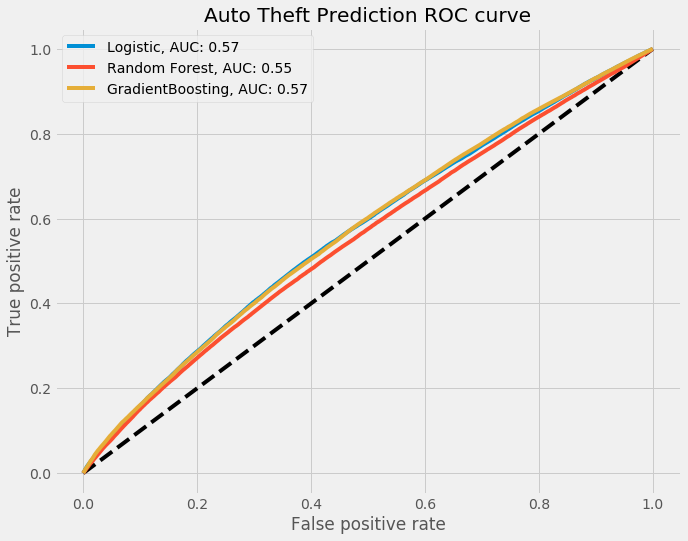

In [201]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_l, tpr_l, label= ('Logistic, AUC: {0:.2f}'.format(auc_score_l)))
plt.plot(fpr_rf, tpr_rf, label=('Random Forest, AUC: {0:.2f}'.format(auc_score_rf)))
plt.plot(fpr_g, tpr_g, label=('GradientBoosting, AUC: {0:.2f}'.format(auc_score_g)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('{} ROC curve'.format('Auto Theft Prediction'))
plt.legend(loc='best')
# plt.savefig('{} roc.png'.format('Auto Theft Prediction'))
# plt.close()

In [ ]:
# print("$ PDP Plots")
# clf = GradientBoostingClassifier(learning_rate=0.5, n_estimators=200, max_depth=3)
# fit = clf.fit(X, y)

# names = ['avg_dist_log', 'avg_rating_by_driver_log', 'avg_rating_of_driver_log',
# 'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct',
# "city_King's Landing", 'city_Winterfell', 'phone_iPhone',
# 'luxury_car_user_True', 'user_lifespan', 'user_rated_driver',
# 'user_rated_driver_avg_rating_of_driver', 'city_Astapor', 'phone_Android',
# 'luxury_car_user_False', 'avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver']

# features = [5,9,15,3,4,6,7,8,14,16,10,11,17,18,19]

# pdp = plt.figure(figsize=(16,8))
# # plt.title('{} Partial Dependency Plot'.format(n_days))
# fig, axs = plot_partial_dependence(fit, X, features, feature_names=names, n_jobs=2, grid_resolution=50)
# fig.set_size_inches(18,12)
# fig.tight_layout()
# fig.savefig('{} pdp.png'.format('Auto Theft'))
# # plt.close(pdp)

In [570]:
params = {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 2,
          'learning_rate': 0.10} #'loss': 'huber'

clf_gbr = GradientBoostingClassifier(**params)

clf_gbr.fit(X_train, y_train)

y_pred = clf_gbr.predict(X_test)

In [574]:
incidents_fe.shape

(2215024, 23)

In [202]:
tp = incidents_fe.drop(['is_assault'],axis=1).columns

In [203]:
X.shape

(2215023, 23)

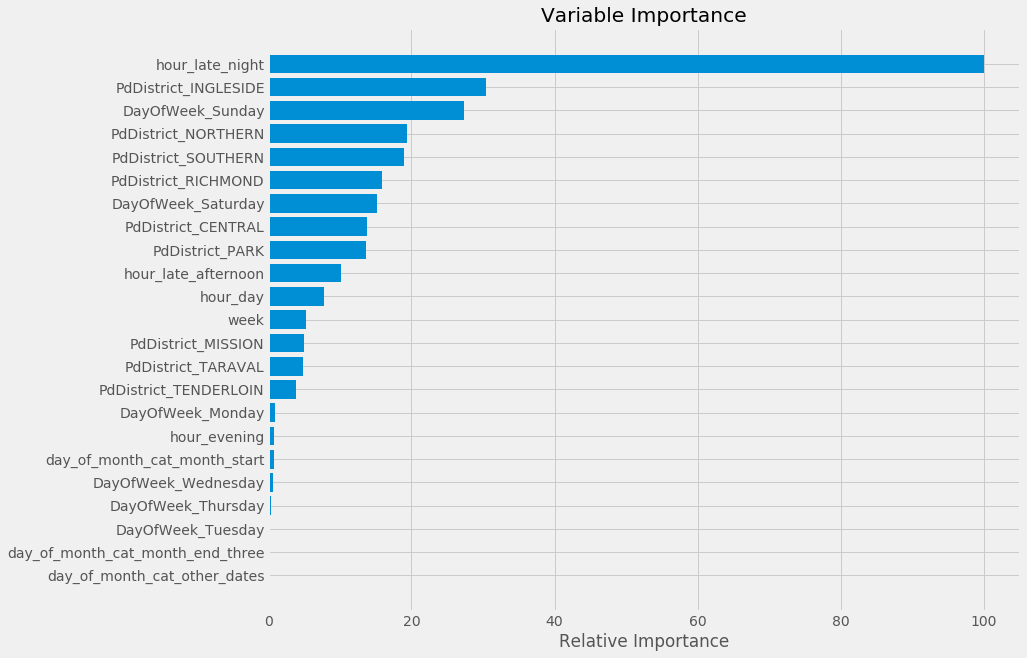

In [205]:
# Plot feature importance
feature_importance = gb.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(12, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, tp[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [206]:
from sklearn.metrics import confusion_matrix

In [207]:
def standard_confusion_matrix(y_true, y_pred):
    [[tn, fp], [fn, tp]] = confusion_matrix(y_true, y_pred)
    return np.array([[tp, fp], [fn, tn]])

In [212]:
# confusion_matrix(y_test, predictedGB)

## Auto Thefts forecasting

In [435]:
incidents_fe['Category'] 

,Category,Descript,Date,year,month,day_of_month,day_of_week_int,hour_int,hour_day,hour_evening,...,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,PdDistrict_nan
0,VEHICLE THEFT,STOLEN MOTORCYCLE,2018-05-15,2018,5,15,1,10,1,0,...,0,0,0,0,0,0,1,0,0,0
1,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",2018-05-15,2018,5,15,1,4,0,0,...,0,0,0,0,0,0,1,0,0,0
2,OTHER OFFENSES,PAROLE VIOLATION,2018-05-15,2018,5,15,1,2,0,0,...,0,0,1,0,0,0,0,0,0,0
3,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2018-05-15,2018,5,15,1,2,0,0,...,0,0,1,0,0,0,0,0,0,0
4,OTHER OFFENSES,TRAFFIC VIOLATION,2018-05-15,2018,5,15,1,2,0,0,...,0,0,1,0,0,0,0,0,0,0


In [120]:
thefts_fe = incidents_fe[incidents_fe['Category'] == 'LARCENY/THEFT']

In [126]:
auto_thefts_fe = thefts_fe[thefts_fe['Descript'].apply(lambda x: "AUTO" in x)]

In [127]:
auto_thefts_fe.shape

(255971, 31)

In [128]:
auto_thefts_fe.head()

,Category,Descript,Date,year,month,day_of_month,week,day_of_week_int,hour_int,hour_day,...,day_of_month_cat_other_dates,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
14,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2018-05-14,2018,5,14,20,0,21,0,...,1,0,0,0,0,0,0,1,0,0
20,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2018-05-14,2018,5,14,20,0,19,0,...,1,0,0,0,0,0,1,0,0,0
34,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,2018-05-14,2018,5,14,20,0,17,0,...,1,0,0,0,0,0,0,1,0,0
59,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2018-05-14,2018,5,14,20,0,12,1,...,1,0,0,0,1,0,0,0,0,0
98,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,2018-05-13,2018,5,13,19,6,22,0,...,1,0,0,0,1,0,0,0,0,0


In [129]:
auto_theft_ts = auto_thefts_fe.set_index('Date')

In [130]:
daily_auto_thefts = auto_theft_ts.groupby('Date').apply(count_rows).reset_index()

In [131]:
daily_auto_thefts = daily_auto_thefts.set_index('Date')

In [132]:
daily_auto_thefts

,0
Date,
2003-01-01,27
2003-01-02,31
2003-01-03,23
2003-01-04,25
2003-01-05,31
...,...
2018-05-10,18
2018-05-11,17
2018-05-12,15


In [133]:
daily_auto_thefts.columns = ['Auto_theft_count']

In [134]:
daily_auto_thefts

,Auto_theft_count
Date,
2003-01-01,27
2003-01-02,31
2003-01-03,23
2003-01-04,25
2003-01-05,31
...,...
2018-05-10,18
2018-05-11,17
2018-05-12,15


In [135]:
y = daily_auto_thefts['Auto_theft_count'].resample('1W').sum()

In [136]:
y = y[:-2] #remove weeks that is not full

In [137]:
plt.style.use('fivethirtyeight')

Text(0.5, 1.0, 'Time series of weekly Auto thefts crimes in SF')

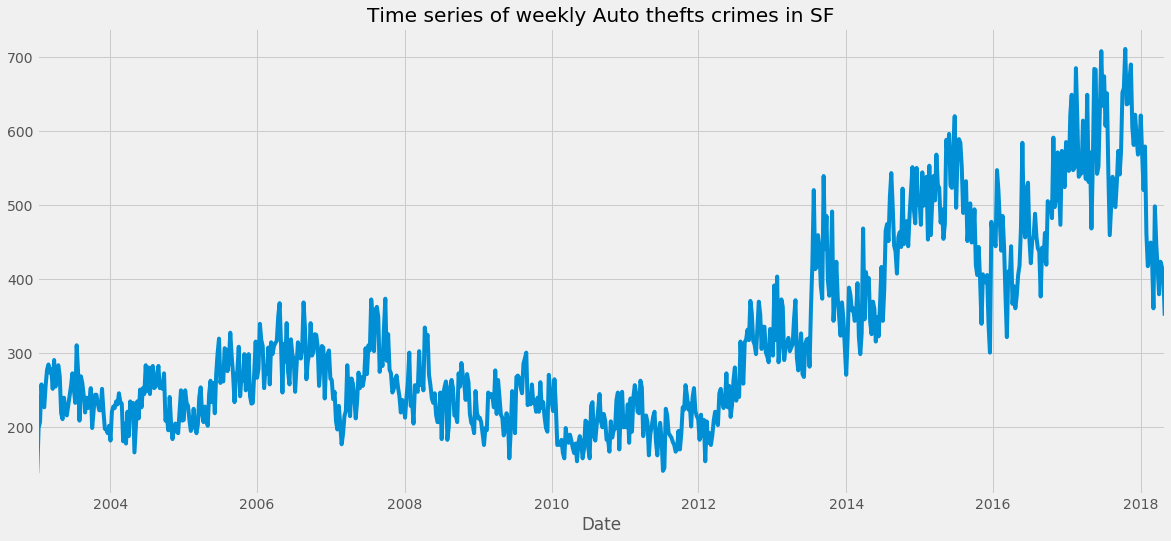

In [138]:
y.plot();
plt.title("Time series of weekly Auto thefts crimes in SF")

In [378]:
import statsmodels.api as sm

In [380]:
from pylab import rcParams

In [382]:
rcParams['figure.figsize'] = 18, 8

In [140]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')

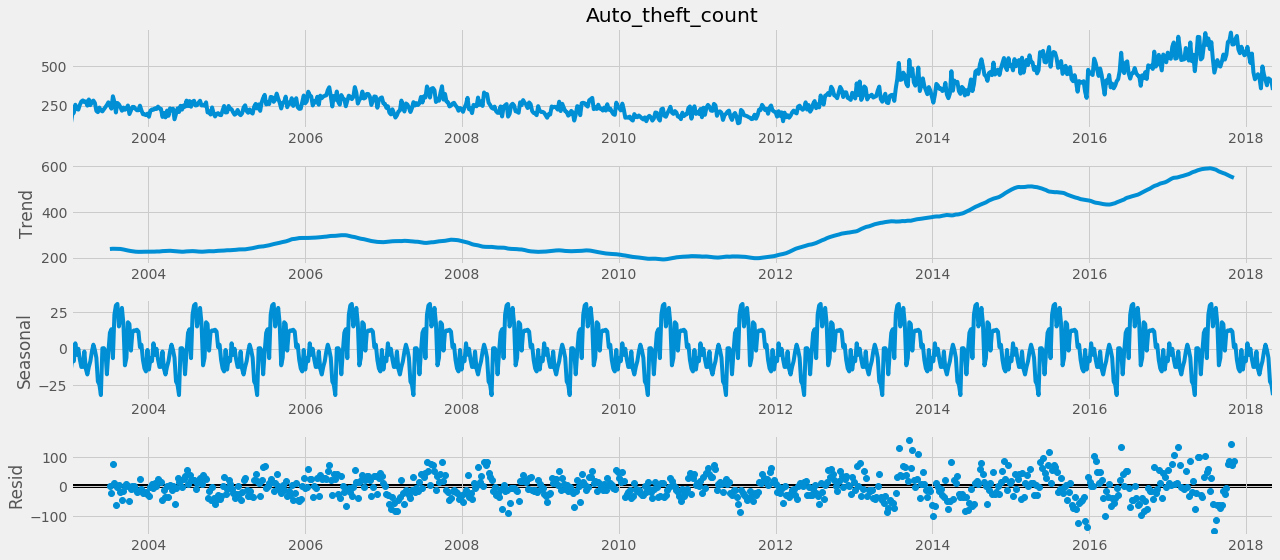

In [141]:
fig = decomposition.plot()
plt.show()

In [385]:
import itertools

In [142]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))



Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
pdq=[1,1,1]

In [500]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:11615.658602565076
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:10658.144880873711
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:8899.906094831198
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:8645.483551236402
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:8914.051644426667
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:8769.80768537912
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:8694.123525331881
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:8645.72832130425
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:10670.1065961854
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:9955.309770005511
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:8633.04154476599
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:8305.944436228157
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:8653.84592646506


/Users/Liyou/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8656.425416952428
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:8394.649335699029
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8307.809183012168
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:8252.46535013178
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:8135.5933536339735
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:8633.413354100921
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:8042.6071933773
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:8145.976907551697
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:8137.50826468778
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:8361.61106548915
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:8044.425229619658
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:8077.2192706277165
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:7964.429070879678
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:8488.39623841947
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:7875.71919217635
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:7983.142401348701
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:7966.245087112033
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:8224.588747408157
ARIMA(0, 1, 1)x

In [425]:
# ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:7871.004393565595


In [143]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 53),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1831      0.062      2.964      0.003       0.062       0.304
ma.L1         -0.6796      0.046    -14.627      0.000      -0.771      -0.589
ar.S.L53       0.0031      0.047      0.066      0.947      -0.089       0.095
ma.S.L53      -1.0000    392.821     -0.003      0.998    -770.915     768.915
sigma2      1479.3621   5.81e+05      0.003      0.998   -1.14e+06    1.14e+06


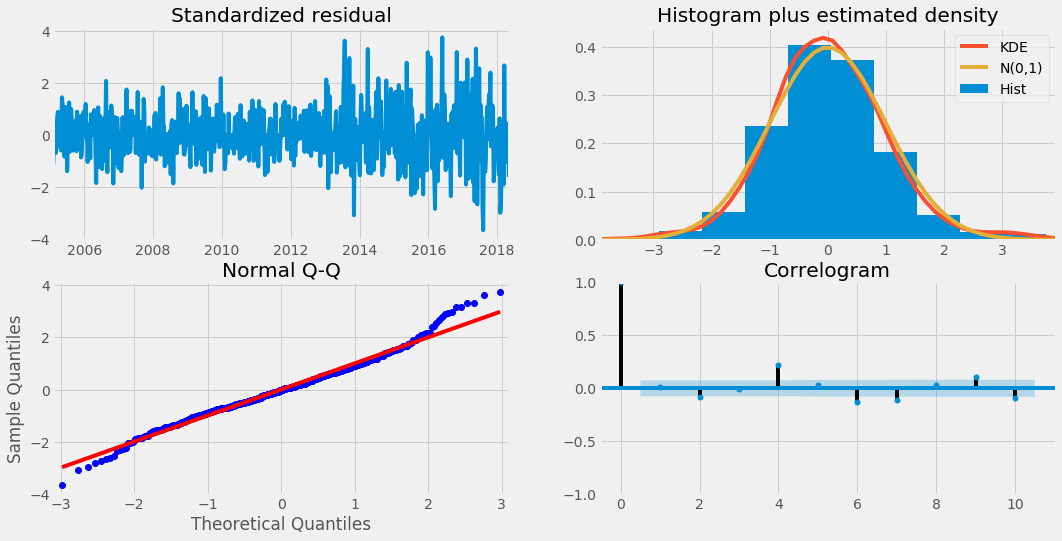

In [144]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [145]:
y.tail(21)

Date
2017-12-17    593
2017-12-24    568
2017-12-31    576
2018-01-07    621
2018-01-14    567
2018-01-21    520
2018-01-28    579
2018-02-04    461
2018-02-11    417
2018-02-18    431
2018-02-25    449
2018-03-04    427
2018-03-11    360
2018-03-18    498
2018-03-25    447
2018-04-01    413
2018-04-08    379
2018-04-15    423
2018-04-22    416
2018-04-29    404
2018-05-06    350
Freq: W-SUN, Name: Auto_theft_count, dtype: int64

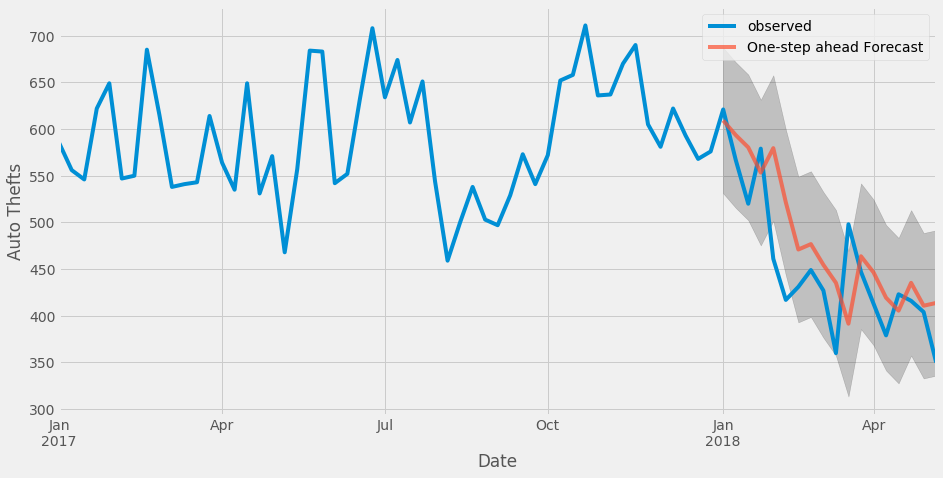

In [146]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-07'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Auto Thefts')
plt.legend()
plt.show()

In [147]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-07':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 3225.52


In [148]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 56.79


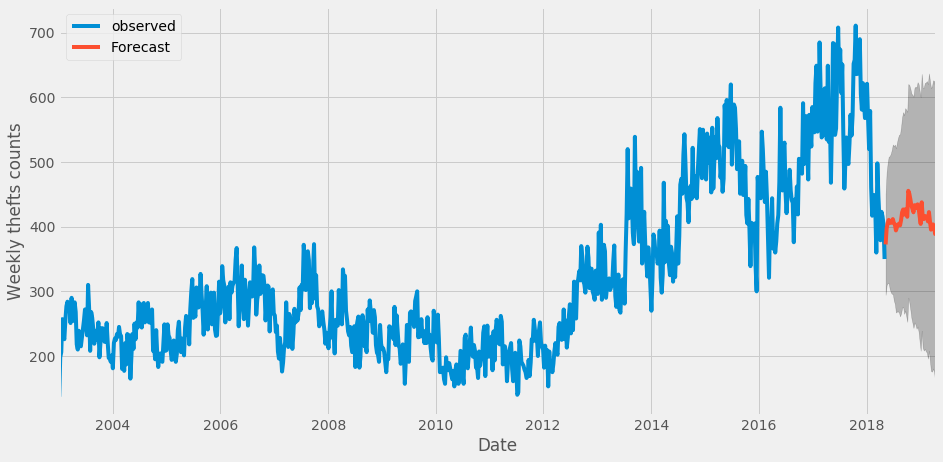

In [149]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Weekly thefts counts')
plt.legend()
plt.show()

In [257]:
incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,year,month,day_of_month,hour,day_of_week_int
0,180362289,VEHICLE THEFT,STOLEN MOTORCYCLE,Tuesday,2018-05-15,10:30,SOUTHERN,NONE,700 Block of TEHAMA ST,-122.411912,37.775207,"{'type': 'Point', 'coordinates': [-122.4119120...",18036228907023,2018,5,15,10,2
1,180360948,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Tuesday,2018-05-15,04:14,SOUTHERN,NONE,MARKET ST / SOUTH VAN NESS AV,-122.419258,37.775146,"{'type': 'Point', 'coordinates': [-122.4192578...",18036094864020,2018,5,15,4,2
2,180360879,OTHER OFFENSES,PAROLE VIOLATION,Tuesday,2018-05-15,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.417813,37.757101,"{'type': 'Point', 'coordinates': [-122.4178125...",18036087926150,2018,5,15,2,2
3,180360879,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Tuesday,2018-05-15,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.417813,37.757101,"{'type': 'Point', 'coordinates': [-122.4178125...",18036087965010,2018,5,15,2,2
4,180360879,OTHER OFFENSES,TRAFFIC VIOLATION,Tuesday,2018-05-15,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.417813,37.757101,"{'type': 'Point', 'coordinates': [-122.4178125...",18036087965015,2018,5,15,2,2


## Clustering for Crimes

In [150]:
from sklearn.cluster import KMeans 

In [151]:
from sklearn.decomposition import PCA

In [152]:
from scipy import stats
from collections import Counter
from sklearn.metrics import silhouette_score
from time import time

In [75]:
# calls = pd.read_csv("police-department-calls-for-service.csv",parse_dates = ['Report Date','Call Date','Offense Date','Call Date Time'])
# calls.columns = [col.strip() for col in calls.columns] 

In [77]:
# cluster_df = calls.drop(useless_cols,axis = 1)

In [78]:
# cluster_df.head()

In [79]:
# def convert_to_cat (df, cols):
#     for i in cols:
#         df[i] = df[i].astype('category')
#     return df

In [80]:
# cluster_df = convert_to_cat(cluster_df, ['Original Crime Type Name','Address Type','Disposition'])

In [81]:
# cluster_df.head()

### PCA

In [153]:
incidents_fe.head()

,Category,Descript,Date,year,month,day_of_month,week,day_of_week_int,hour_int,hour_day,...,day_of_month_cat_other_dates,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,VEHICLE THEFT,STOLEN MOTORCYCLE,2018-05-15,2018,5,15,20,1,10,1,...,0,0,0,0,0,0,0,1,0,0
1,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",2018-05-15,2018,5,15,20,1,4,0,...,0,0,0,0,0,0,0,1,0,0
2,OTHER OFFENSES,PAROLE VIOLATION,2018-05-15,2018,5,15,20,1,2,0,...,0,0,0,1,0,0,0,0,0,0
3,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2018-05-15,2018,5,15,20,1,2,0,...,0,0,0,1,0,0,0,0,0,0
4,OTHER OFFENSES,TRAFFIC VIOLATION,2018-05-15,2018,5,15,20,1,2,0,...,0,0,0,1,0,0,0,0,0,0


In [154]:
incidents_fe.columns

Index(['Category', 'Descript', 'Date', 'year', 'month', 'day_of_month', 'week',
       'day_of_week_int', 'hour_int', 'hour_day', 'hour_evening',
       'hour_late_afternoon', 'hour_late_night', 'DayOfWeek_Monday',
       'DayOfWeek_Saturday', 'DayOfWeek_Sunday', 'DayOfWeek_Thursday',
       'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday',
       'day_of_month_cat_month_end_three', 'day_of_month_cat_month_start',
       'day_of_month_cat_other_dates', 'PdDistrict_CENTRAL',
       'PdDistrict_INGLESIDE', 'PdDistrict_MISSION', 'PdDistrict_NORTHERN',
       'PdDistrict_PARK', 'PdDistrict_RICHMOND', 'PdDistrict_SOUTHERN',
       'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN'],
      dtype='object')

In [156]:
crimes_fe = incidents_fe[incidents_fe['Category'] != 'NON-CRIMINAL']

In [157]:
crimes_fe.head()

,Category,Descript,Date,year,month,day_of_month,week,day_of_week_int,hour_int,hour_day,...,day_of_month_cat_other_dates,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,VEHICLE THEFT,STOLEN MOTORCYCLE,2018-05-15,2018,5,15,20,1,10,1,...,0,0,0,0,0,0,0,1,0,0
2,OTHER OFFENSES,PAROLE VIOLATION,2018-05-15,2018,5,15,20,1,2,0,...,0,0,0,1,0,0,0,0,0,0
3,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2018-05-15,2018,5,15,20,1,2,0,...,0,0,0,1,0,0,0,0,0,0
4,OTHER OFFENSES,TRAFFIC VIOLATION,2018-05-15,2018,5,15,20,1,2,0,...,0,0,0,1,0,0,0,0,0,0
5,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",2018-05-15,2018,5,15,20,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
drop_cols(crimes_fe, ['Descript','Date','year'])

In [82]:
calls_fe.head()

,common_loc_bool,is_Common Location,crime_type_Passing Call,crime_type_Traffic Stop,crime_type_Suspicious Person,crime_type_Homeless Complaint,disposition_HAN,disposition_GOA,disposition_CIT,disposition_ADV,...,call_hour_late_afternoon,call_hour_late_night,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Tue,day_of_week_Wed,day_of_month_cat_end,day_of_month_cat_mid
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [84]:
X = calls_fe.values

In [85]:
scaler = StandardScaler()
scaler.fit(calls_fe.values)
X_scaled = scaler.transform(calls_fe.values)

In [86]:
X.shape

(3035330, 27)

In [94]:
def PCA_reduce(X,dimensionality):
    '''[summary]
    reduced n dimensionality matrix and np array of important features
    Arguments:
        X {[numpy matrix]} -- input matrix
        dimensionality {[int]} -- to what dimensionality to reduce to
    Returns:
        X_reduced -- reduced matrix
        important_features -- a list of features that contributed most to the principle component
    '''

    important_features = []
    pcd = PCA(dimensionality).fit(X)
    pca_matrix = pcd.components_
    for i in range(dimensionality):
        print('#{} Principle Component top 5 contributors are:'.format(i), np.argsort(np.abs(pca_matrix[i,:]))[-5:])
        important_features.append(np.argsort(np.abs(pca_matrix[i,:]))[-3:])
    X_reduced = np.dot(X,pcd.components_.T)
    print('Reduced X shape:', X_reduced.shape)
    important_features = np.array(important_features)
    print('Explained variance:', pcd.explained_variance_)
    print('Explained variance ratio:', pcd.explained_variance_ratio_)
    print('Explained variance ratio accumulated:', pcd.explained_variance_ratio_.cumsum())
    return X_reduced, important_features


In [108]:
important_features = []
pcd = PCA(10).fit(X)
pca_matrix = pcd.components_
for i in range(10):
    print('#{} Principle Component top 5 contributors are:'.format(i), np.argsort(np.abs(pca_matrix[i,:]))[-5:])
    important_features.append(np.argsort(np.abs(pca_matrix[i,:]))[-3:])
re_X_ww = np.dot(X,pcd.components_.T)
print('Reduced X shape:', re_X_ww.shape)

imp_f_ww = np.array(important_features)
print('Explained variance:', pcd.explained_variance_)
print('Explained variance ratio:', pcd.explained_variance_ratio_)
print('Explained variance ratio accumulated:', pcd.explained_variance_ratio_.cumsum())


#0 Principle Component top 5 contributors are: [17  2 15 13 14]
#1 Principle Component top 5 contributors are: [20 15 13 25 26]
#2 Principle Component top 5 contributors are: [14 16  6 17 15]
#3 Principle Component top 5 contributors are: [ 2  0  1 13  6]
#4 Principle Component top 5 contributors are: [17 16  0  1  6]
#5 Principle Component top 5 contributors are: [ 0  1  6 17 16]
#6 Principle Component top 5 contributors are: [20 21 23 19 24]
#7 Principle Component top 5 contributors are: [ 8 20 24 19 23]
#8 Principle Component top 5 contributors are: [ 3  8 23 19 21]
#9 Principle Component top 5 contributors are: [ 7  8 21 23 20]
Reduced X shape: (3035330, 10)
Explained variance: [0.44806277 0.35042103 0.33997379 0.31031311 0.20274319 0.19523443
 0.14772697 0.14533773 0.14385062 0.14249428]
Explained variance ratio: [0.12711305 0.0994126  0.09644877 0.08803419 0.05751717 0.05538698
 0.04190936 0.04123155 0.04080966 0.04042487]
Explained variance ratio accumulated: [0.12711305 0.22652

In [109]:
imp_f_ww

array([[15, 13, 14],
       [13, 25, 26],
       [ 6, 17, 15],
       [ 1, 13,  6],
       [ 0,  1,  6],
       [ 6, 17, 16],
       [23, 19, 24],
       [24, 19, 23],
       [23, 19, 21],
       [21, 23, 20]])

Text(0, 0.5, 'Accumulated Explained Variance')

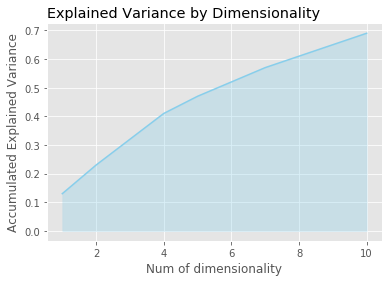

In [110]:
# Plot explained variance by dimensionality
x = range(1,11)
y = np.round(pcd.explained_variance_ratio_.cumsum(),2)
plt.fill_between(x, y, color="skyblue", alpha=0.3)
plt.plot(x, y, color="skyblue")
 
# Add titles and labels
plt.title("Explained Variance by Dimensionality", loc="left")
plt.xlabel("Num of dimensionality")
plt.ylabel("Accumulated Explained Variance")

In [143]:
pcd = PCA(4).fit(X) #re-assign PCA class to reduce to 4 dimensionality

In [111]:
re_X_ww = re_X_ww[:,:4] #cut dimensiontly from 10 to 4

In [116]:
def print_imp_features(df,imp_features):
    '''[summary]
    print important features names and return the counter of the features
    Arguments:
        df {[pandas dataframe]} -- input
        imp_features {[list]} -- important features returned from pca_reduce function
    Returns:
        counter [dictionary] -- a dictionary with feature name as key, and frequency showed as value 
    '''

    feature = []
    idx = 0
    c = 1
    while idx < len(np.array(imp_features).flatten()):
        print('#{} PC:'.format(c))
        if idx+3 > len(np.array(imp_features).flatten()):
            for i in np.array(imp_features).flatten()[idx:]:
                feature.append(list(df.columns)[i])
                print(list(df.columns)[i])
        else:
            for i in np.array(imp_features).flatten()[idx:idx+3]:
                feature.append(list(df.columns)[i])
                print(list(df.columns)[i])
        idx += 3
        c +=1
    counter = Counter(feature)
    return counter

In [117]:
# print out top 5 contributers for each principle component to understand what features are providing signals
counter = print_imp_features(calls_fe,imp_f_ww[:4,:])

#1 PC:
call_hour_day
Address Type_Intersection
Address Type_Premise Address
#2 PC:
Address Type_Intersection
day_of_month_cat_end
day_of_month_cat_mid
#3 PC:
disposition_HAN
call_hour_late_afternoon
call_hour_day
#4 PC:
is_Common Location
Address Type_Intersection
disposition_HAN


### We will use 3 dimensionality here for visualization purpose.

In [118]:
re_X_3 = re_X_ww[:,:3]

In [119]:
from mpl_toolkits.mplot3d import Axes3D

In [120]:
def matplotlib_3D_X_reduced(X_reduced,label1="First Principle Component",label2="Second Principle Component",label3="Third Principle Component",title="Scatterplot in PCA 3D-Plane"):
    '''use matplotlib to plot the 3D PCA results'''
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    # for c, m in [('r', 'o'), ('b', '^')]:
    xs=X_reduced[:,0]
    ys=X_reduced[:,1]
    zs=X_reduced[:,2]
    ax.scatter(xs, ys, zs, c='green', marker='^')
    ax.set_xlabel(label1)
    ax.set_ylabel(label2)
    ax.set_zlabel(label3)
    ax.set_title(title)
    plt.show()

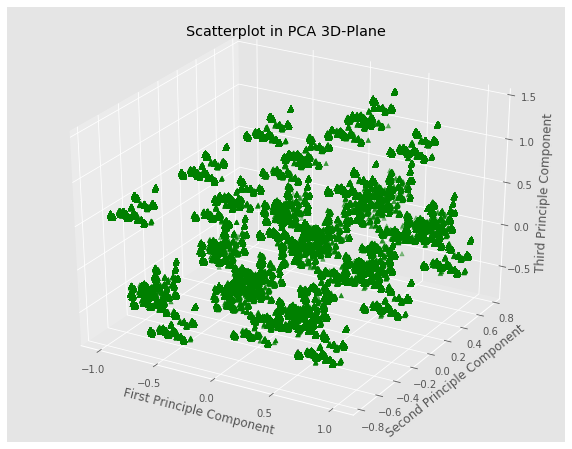

In [121]:
matplotlib_3D_X_reduced(re_X_3)

### KMeans modeling

In [122]:
def kmeans_cluster(X_reduced,cluster_num):
    '''[summary]
    use kmeans++ algorithems to cluster input data.
    Arguments:
        X_reduced {[numpy matrix]} -- input matrix
        cluster_num {[int]} -- how many clusters for clustering 
    Returns:
        y[numpy array] -- assigned_cluster for each row
        centers[numpy matrix] -- centers of the clusters
    '''

    kmeans = KMeans(init='k-means++', n_clusters=cluster_num, n_init=10,tol=0.0001,verbose=0)
    y = kmeans.fit_predict(X_reduced)
    centers = kmeans.cluster_centers_
    # assigned_cluster = kmeans.transform(X_reduced).argmin(axis=1)
    return y, centers

In [124]:
re_X_ww.shape

(3035330, 4)

In [125]:
kmeans = KMeans(init='k-means++', n_clusters=6, n_init=10,tol=0.0001,verbose=0)
y = kmeans.fit_predict(re_X_ww)
centers = kmeans.cluster_centers_


In [153]:
silhouette_score(re_X_ww,y2,sample_size = 5000)

0.33571142514053254

In [154]:
silhouette_score(re_X_ww,y,sample_size = 5000)

0.37115330078824993

In [147]:
kmeans2 = KMeans(init='k-means++', n_clusters=3, n_init=10,tol=0.0001,verbose=0)
y2 = kmeans2.fit_predict(re_X_ww)

In [155]:
kmeans3 = KMeans(init='k-means++', n_clusters=5, n_init=10,tol=0.0001,verbose=0)
y3 = kmeans3.fit_predict(re_X_ww)

In [156]:
silhouette_score(re_X_ww,y3,sample_size = 5000)

0.3693928617270637

In [131]:
calls_fe['clustering_6d'] = y

In [132]:
def plot_3D_kmeans(X_reduced,y,xlabel,ylabel,zlabel,title,xlim=None,ylim=None,zlim=None):
    '''use matplotlib to plot the 3D kmeans cluster results'''
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    # for c, m in [('r', 'o'), ('b', '^')]:
    xs=X_reduced[:,0]
    ys=X_reduced[:,1]
    zs=X_reduced[:,2]
    ax.scatter(xs, ys, zs, c=y, marker='^')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_title(title)
    if xlim != None:
        ax.set_xlim(xlim[0],xlim[1])
    if ylim != None:
        ax.set_ylim(ylim[0],ylim[1])
    if zlim != None:
        ax.set_zlim(zlim[0],zlim[1])
    plt.show()

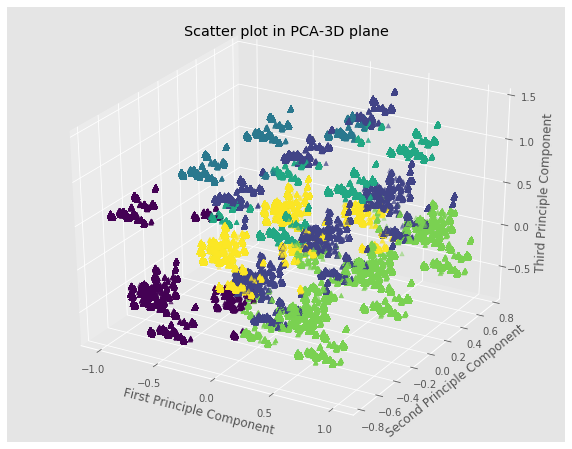

In [133]:
plot_3D_kmeans(re_X_3,y,"First Principle Component","Second Principle Component","Third Principle Component",'Scatter plot in PCA-3D plane')

In [57]:
def count_rows(x):
    return len(x)

In [136]:
calls_fe.groupby('clustering_6d').apply(count_rows) * 1.0 /calls_fe.shape[0]

clustering_6d
0    0.186599
1    0.141515
2    0.155827
3    0.144144
4    0.200390
5    0.171526
dtype: float64

### Interpretation on Kmeans clusters for calls

In [144]:
non_scaled_centers = pcd.inverse_transform(centers)

In [ ]:
# scaler = StandardScaler().fit(calls_fe.iloc[:,:-1])

In [ ]:
# engineered_centers = scaler.inverse_transform(scaled_centers)

In [138]:
centers

array([[-0.73520466, -0.70587104,  0.09731734, -0.01857897],
       [ 0.28405657, -0.00167116,  0.58971398,  0.95475739],
       [-0.83505578,  0.39319028,  0.62819994, -0.20247248],
       [ 0.5013606 , -0.0304876 ,  0.85005177, -0.56138681],
       [ 0.75311621, -0.04861423, -0.24373982, -0.25103722],
       [-0.60352889,  0.37545062, -0.42232071,  0.11475861]])

In [145]:
center_person = pd.DataFrame(non_scaled_centers,columns=calls_fe.columns[:-1])

In [146]:
center_person.transpose()

,0,1,2,3,4,5
common_loc_bool,0.037936,0.559438,0.037941,0.057804,0.055315,0.041593
is_Common Location,0.037936,0.559438,0.037941,0.057804,0.055315,0.041593
crime_type_Passing Call,0.026897,0.625809,0.034243,0.161432,0.146929,0.025416
crime_type_Traffic Stop,-0.008359,-0.082871,0.000922,0.275358,0.264443,-0.015255
crime_type_Suspicious Person,0.042128,0.018912,0.046583,0.075600,0.068046,0.038521
crime_type_Homeless Complaint,0.058813,0.032990,0.076334,0.076221,0.039059,0.040260
disposition_HAN,0.216493,0.878544,0.238537,0.239750,0.186655,0.195556
disposition_GOA,0.208022,-0.029097,0.198792,0.070984,0.085363,0.211958
disposition_CIT,0.093871,-0.099635,0.109938,0.233585,0.206105,0.078967
disposition_ADV,0.084149,-0.034276,0.086874,0.167852,0.165390,0.081647


In [ ]:
def plot_radar(df, figname=None, dpi=64, category=False, num_of_cat=False,ylim=(0,1)):
    '''plot spider graph to interpret clustering results
    INPUT - df: cluster number as index'''
    # initialize the figure
    my_dpi = dpi
    plt.figure(figsize=(1333/my_dpi,900/my_dpi), dpi=my_dpi)
    # plt.tight_layout()

    # Create a color palette:
    my_palette = plt.cm.get_cmap("Set1", len(df.index))

    for row in range(0, len(df.index)):
        make_spider(df=df, row=row, title='group{}'.format(
            row), color=my_palette(row), category=category, num_of_cat=num_of_cat,ylim=ylim)
    if figname != None:
        plt.savefig('{}.png'.format(figname))